### Further clean RISK variables (round to 2 decimals / integerize / ...)

In [1]:
import gc
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import random
import sys
import time
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from pandarallel import pandarallel

In [2]:
from pathlib import Path
rootpath = Path.cwd().parent
sys.path.append(os.path.join(rootpath))

In [3]:
from utils.constants import *
from utils.eda_helpers import (
    plot_missing_proportion_barchart, get_cols, plot_scatterplot, plot_target_check, 
    plot_int_feature_distribution, plot_train_test_distribution, check_overlap_missing,
    insert_row_number, plot_sampled_time_series
)
from utils.eval_helpers import (
    plot_roc_curves, plot_feature_importance, 
    amex_metric, get_final_metric_df, amex_metric_np, lgb_amex_metric
)
from utils.extraction_helpers import read_file
from utils.feature_group import (
    CATEGORY_COLUMNS, CONTINUOUS_COLUMNS, BINARY_COLUMNS,
    MEAN_FEATURES, MIN_FEATURES, MAX_FEATURES, LAST_FEATURES, NON_FEATURE_COLUMNS
)
from utils.preprocess_helpers import *

In [4]:
%load_ext autoreload
%autoreload

In [5]:
gc.collect()

36

In [6]:
# train, test = drop_temp_columns(train, test)

In [7]:
START = time.time()

### Read Data

In [8]:
%%time
train = read_file(f"{RAW_TRAIN_PARQUET_PATH}/raw_risk.parquet")
test = read_file(f"{RAW_TEST_PARQUET_PATH}/raw_risk.parquet")

Shape of data: (5531451, 30)
Shape of data: (11363762, 30)
CPU times: user 3.36 s, sys: 3.89 s, total: 7.26 s
Wall time: 4.83 s


In [9]:
%%time
labels = pd.read_csv(f"{RAW_DATA_PATH}/train_labels.csv")
if "target" not in train.columns:
    train = train.merge(labels, on="customer_ID", how="left")

CPU times: user 777 ms, sys: 337 ms, total: 1.11 s
Wall time: 1.11 s


In [10]:
train.shape, test.shape

((5531451, 31), (11363762, 30))

In [11]:
train_cid_list = train["customer_ID"].unique().tolist()

In [12]:
print(sorted(get_cols(train, ["R_"])))

['R_1', 'R_10', 'R_11', 'R_12', 'R_13', 'R_14', 'R_15', 'R_16', 'R_17', 'R_18', 'R_19', 'R_2', 'R_20', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_26', 'R_27', 'R_28', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9']


In [13]:
train["target"].mean()

0.24909720794778803

### R_1

0 null count, 0.000 null proportion
nan of the targets have label = 1


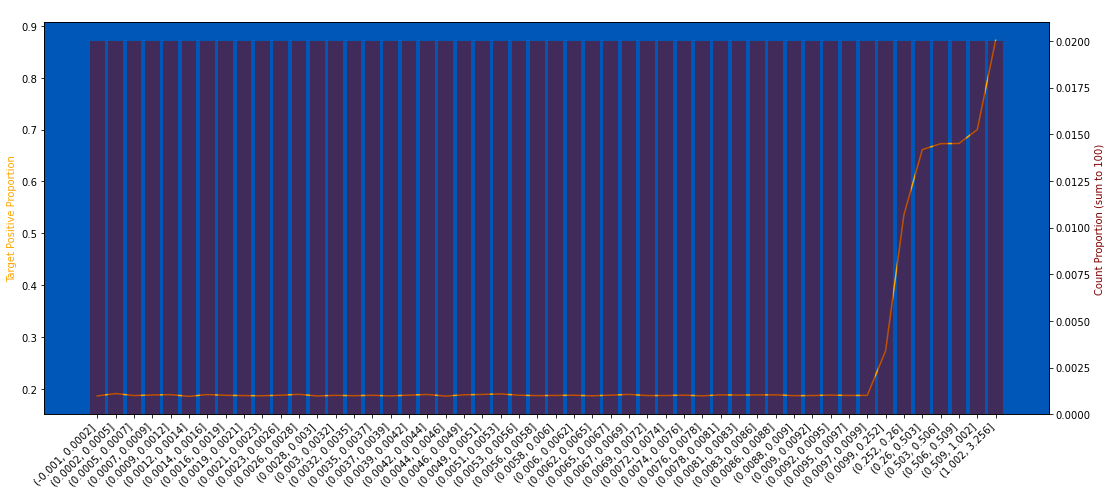

In [14]:
plot_target_check(train, "R_1", q=50, use_raw_bin=True)

In [15]:
%%time
train, test = round_dfs(train, test, col="R_1", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 269 ms, sys: 693 ms, total: 962 ms
Wall time: 1.88 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


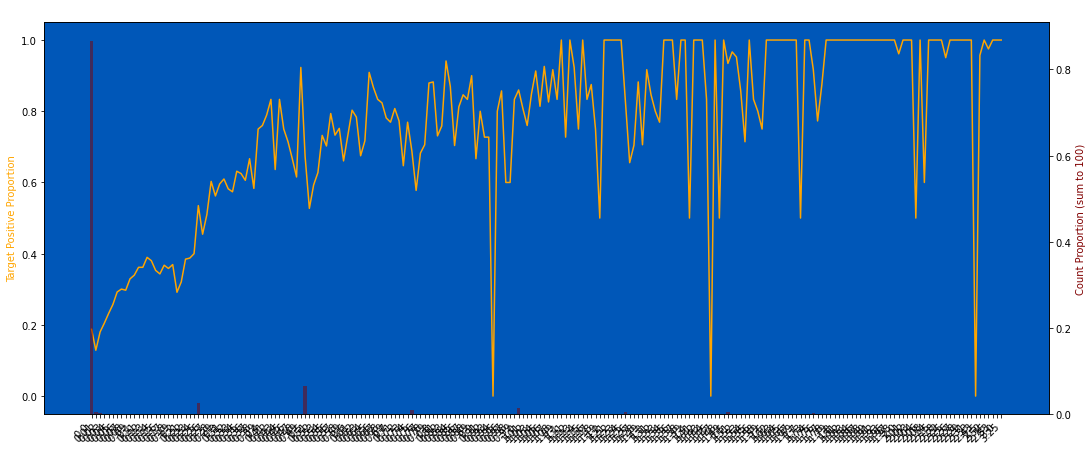

In [16]:
plot_target_check(train, "R_1", q=50, use_raw_bin=True, nunique_thr=1500, strfy_x=True, without_drop_tail=True)

**Comments:**
- Should group this variable based on the interval of 0.25, i.e. (0, 0.25, 0.5, 0.75, 1, 1.25, ...)

In [17]:
if train["R_1"].max() < 4:
    train["R_1"] = train["R_1"] * 4
    test["R_1"] = test["R_1"] * 4

In [18]:
%%time
train, test = round_dfs(train, test, col="R_1", decimals=0, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 128 ms, sys: 393 ms, total: 521 ms
Wall time: 1.09 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


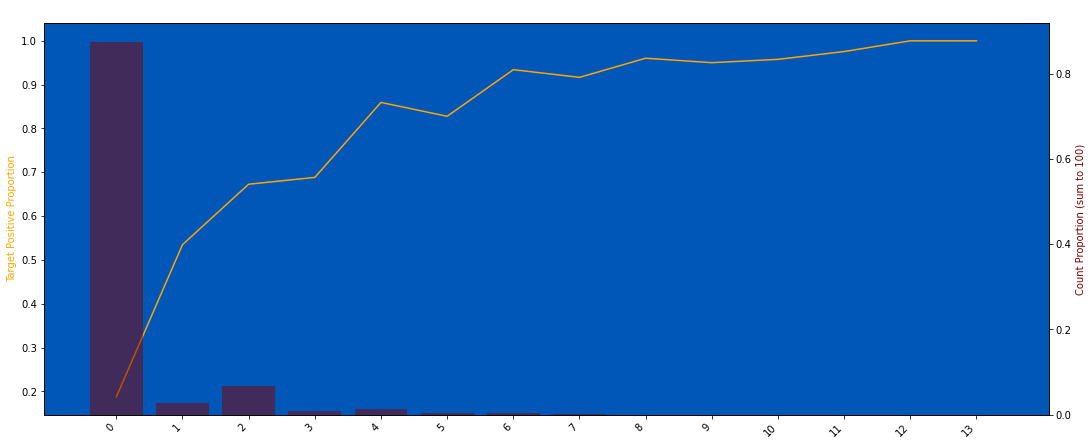

In [19]:
plot_target_check(train, "R_1", q=50, use_raw_bin=True, nunique_thr=2000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


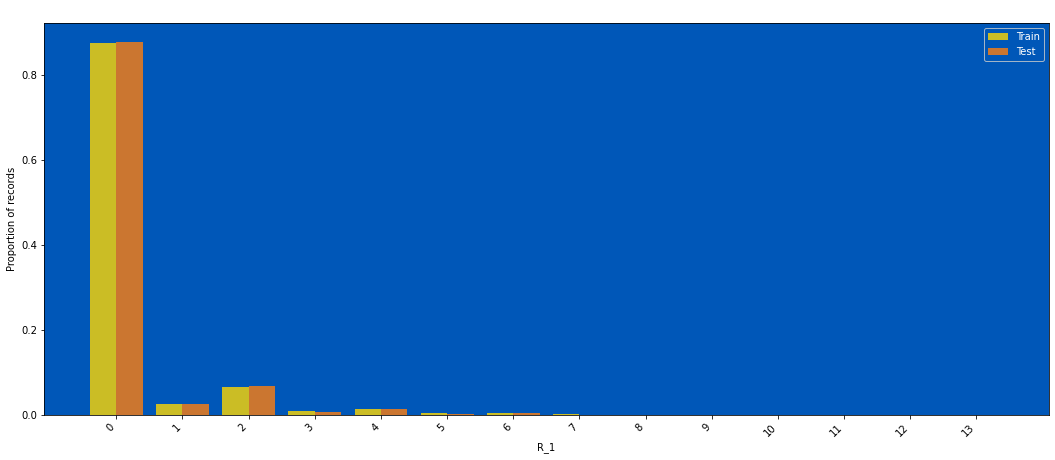

In [20]:
plot_train_test_distribution(train, test, "R_1", nunique_thr=10000, without_drop_tail=True)

### R_2

0 null count, 0.000 null proportion
nan of the targets have label = 1


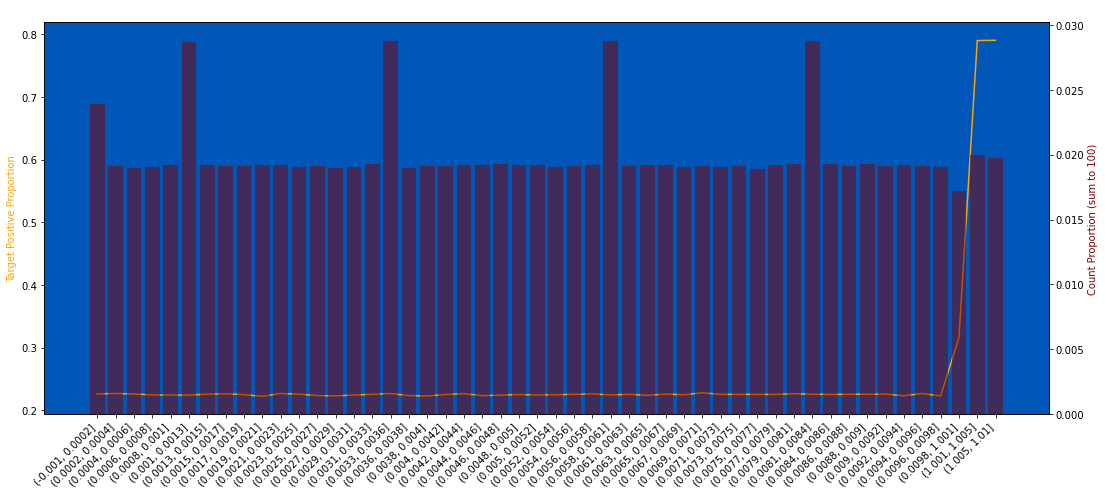

In [21]:
plot_target_check(train, "R_2", q=50, use_raw_bin=True)

In [22]:
%%time
train, test = round_dfs(train, test, col="R_2", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 261 ms, sys: 747 ms, total: 1.01 s
Wall time: 1.9 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


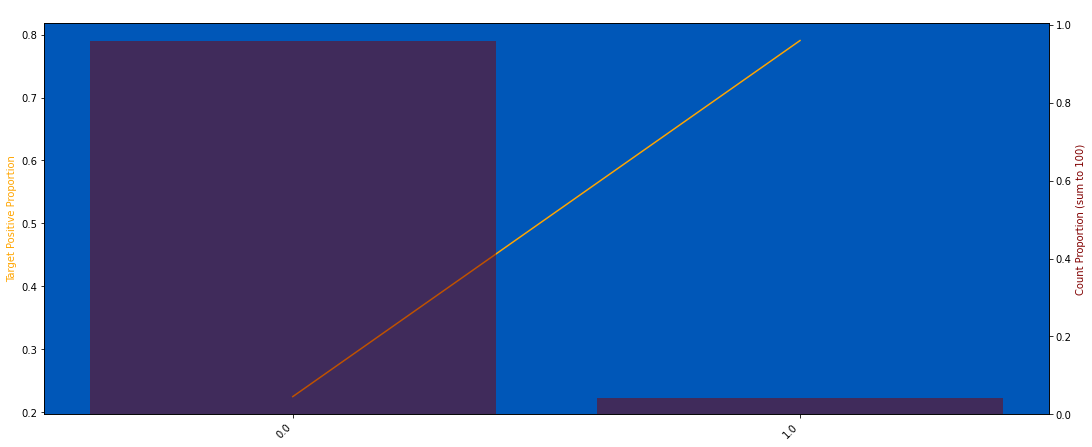

In [23]:
plot_target_check(train, "R_2", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


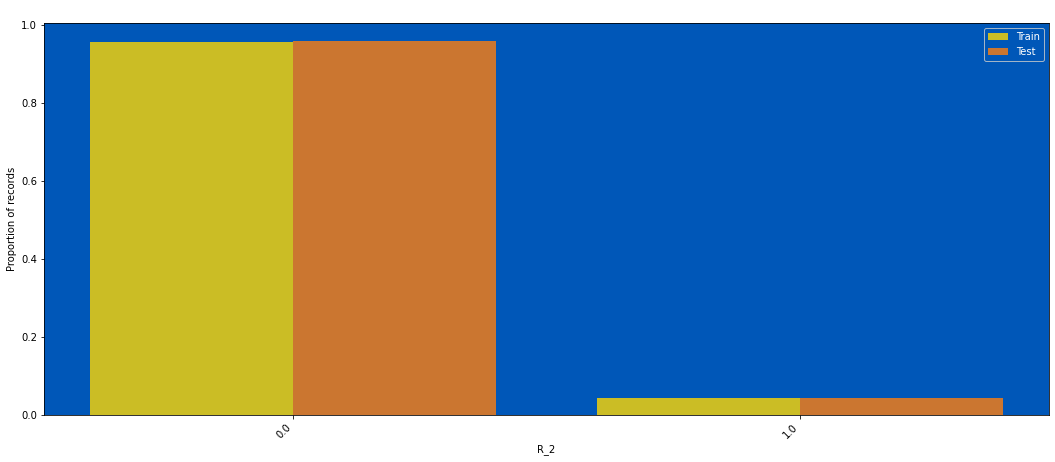

In [24]:
plot_train_test_distribution(train, test, "R_2", nunique_thr=100)

### R_3

0 null count, 0.000 null proportion
nan of the targets have label = 1


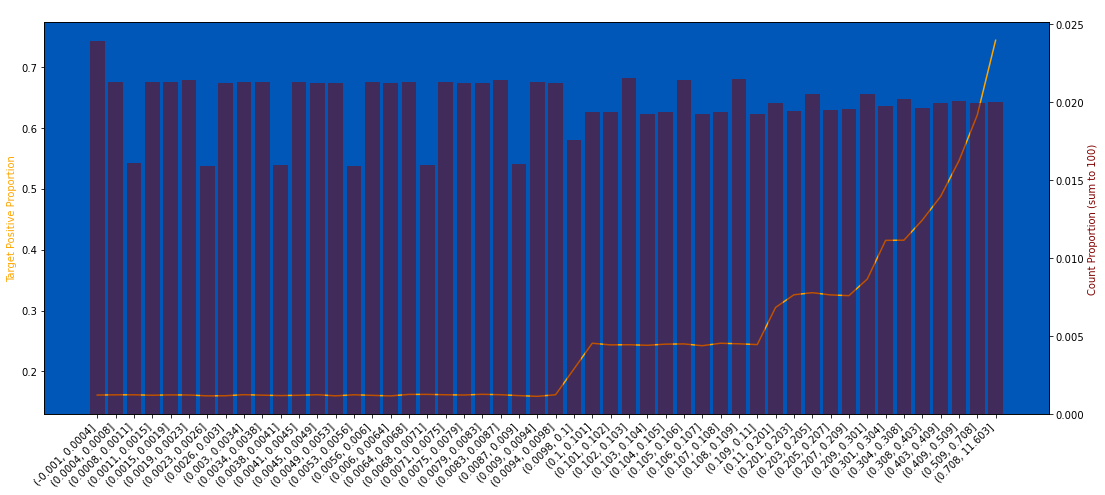

In [25]:
plot_target_check(train, "R_3", q=50, use_raw_bin=True)

In [26]:
%%time
train, test = round_dfs(train, test, col="R_3", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 263 ms, sys: 715 ms, total: 978 ms
Wall time: 1.9 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


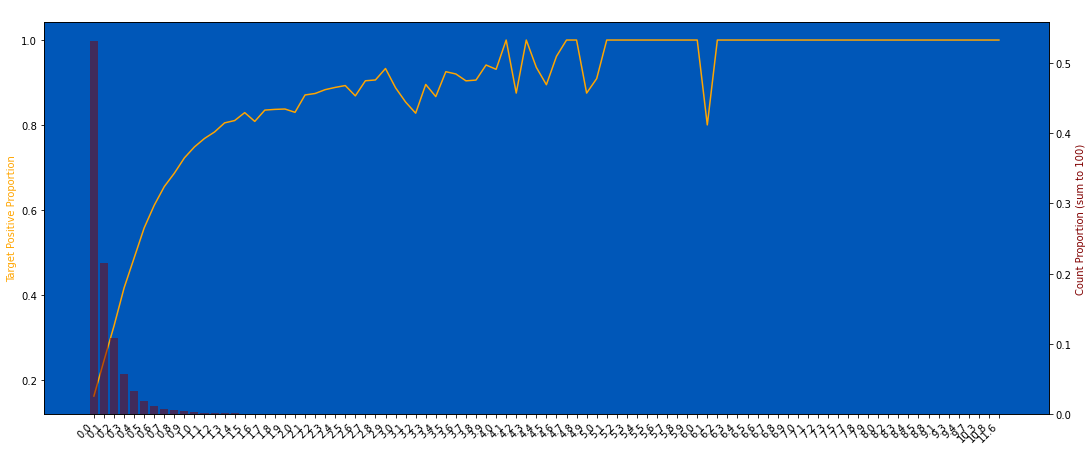

In [27]:
plot_target_check(train, "R_3", q=50, use_raw_bin=True, nunique_thr=1500, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


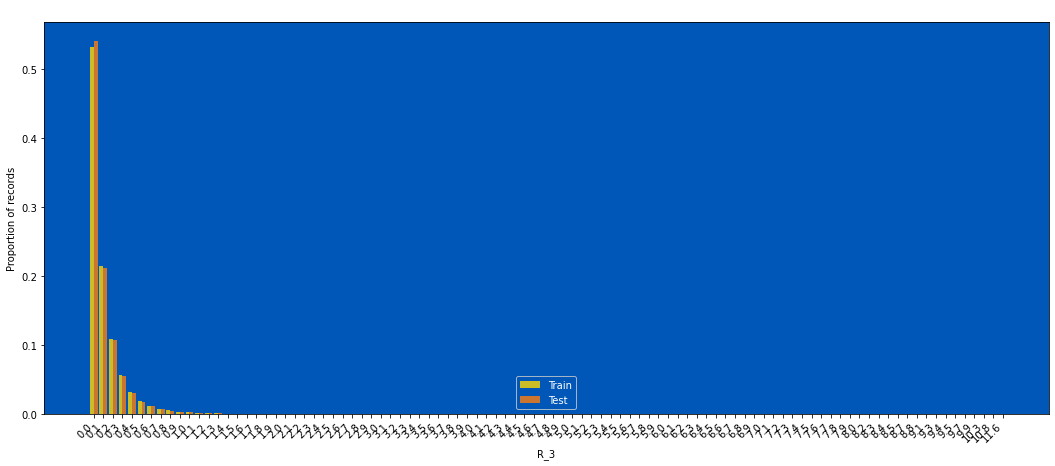

In [28]:
plot_train_test_distribution(train, test, "R_3", nunique_thr=100, without_drop_tail=True)

### R_4

0 null count, 0.000 null proportion
nan of the targets have label = 1


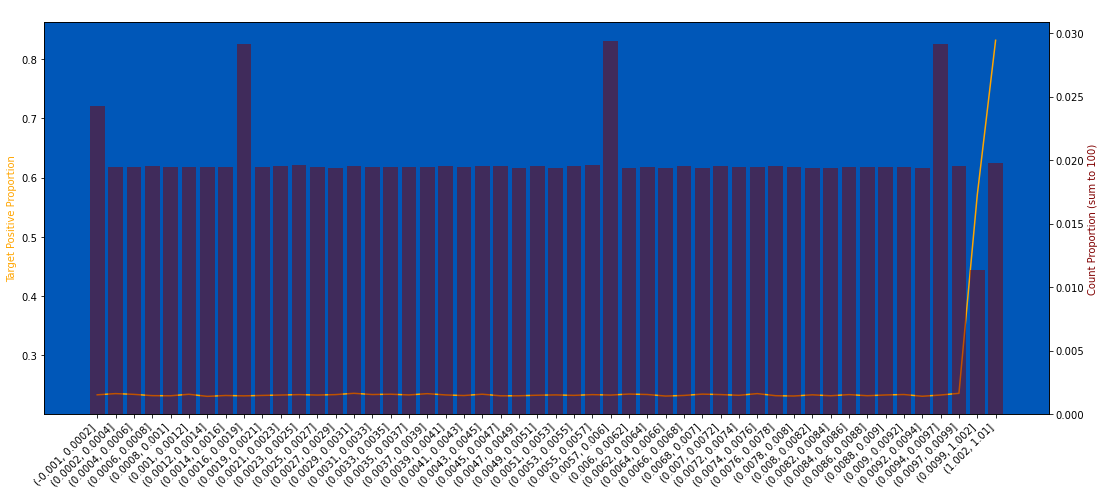

In [29]:
plot_target_check(train, "R_4", q=50, use_raw_bin=True)

In [30]:
%%time
train, test = round_dfs(train, test, col="R_4", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 265 ms, sys: 711 ms, total: 976 ms
Wall time: 1.89 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


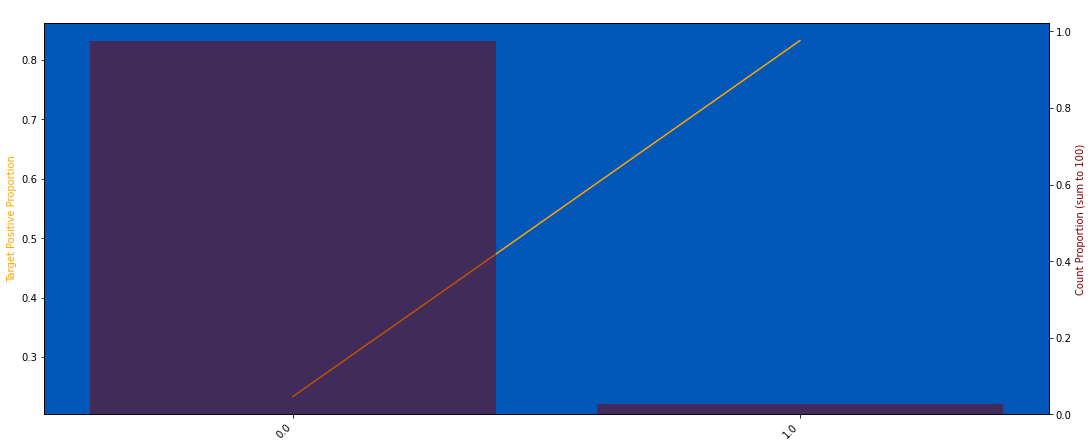

In [31]:
plot_target_check(train, "R_4", q=50, use_raw_bin=True, nunique_thr=15000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


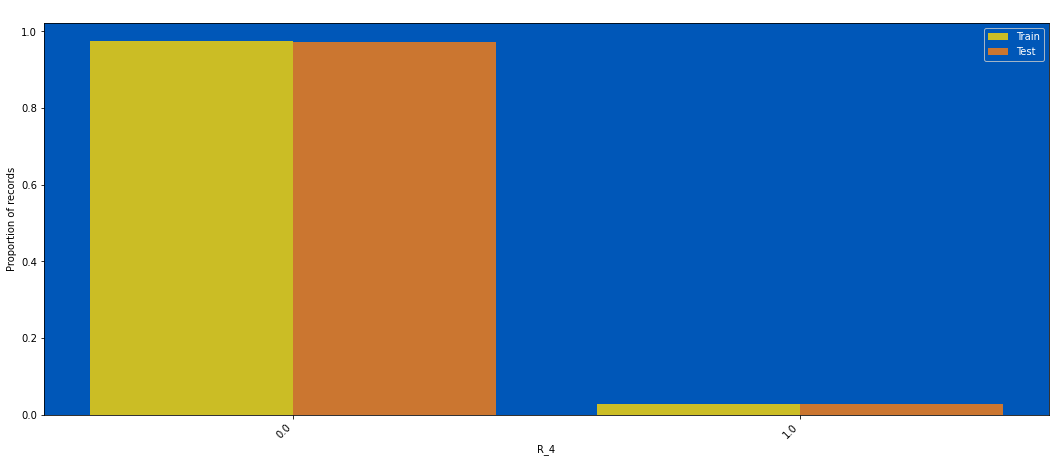

In [32]:
plot_train_test_distribution(train, test, "R_4", nunique_thr=100, without_drop_tail=True)

### R_5

0 null count, 0.000 null proportion
nan of the targets have label = 1


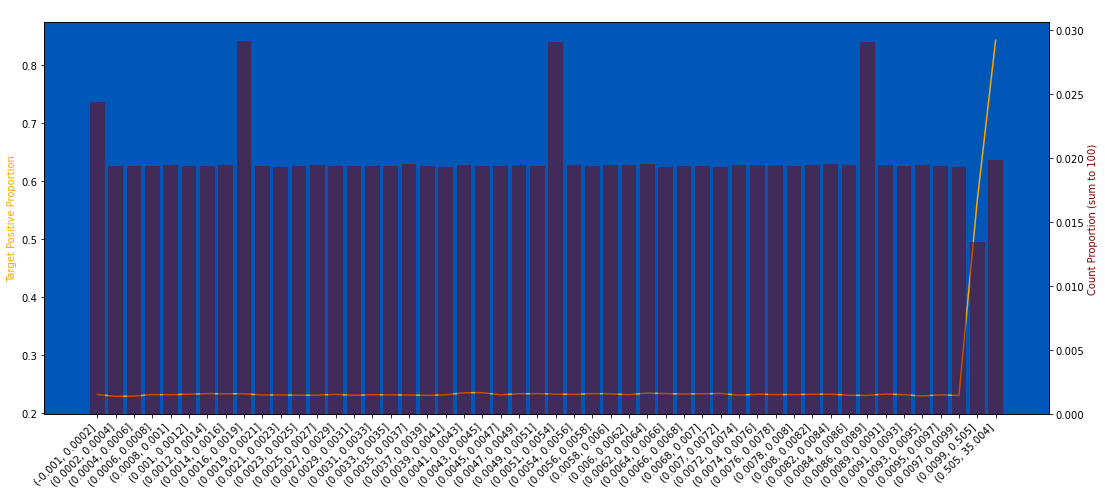

In [33]:
plot_target_check(train, "R_5", q=50, use_raw_bin=True, nunique_thr=2)

In [34]:
%%time
train, test = round_dfs(train, test, col="R_5", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 259 ms, sys: 693 ms, total: 952 ms
Wall time: 1.87 s


In [35]:
train["R_5"] *= 2
test["R_5"] *= 2

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


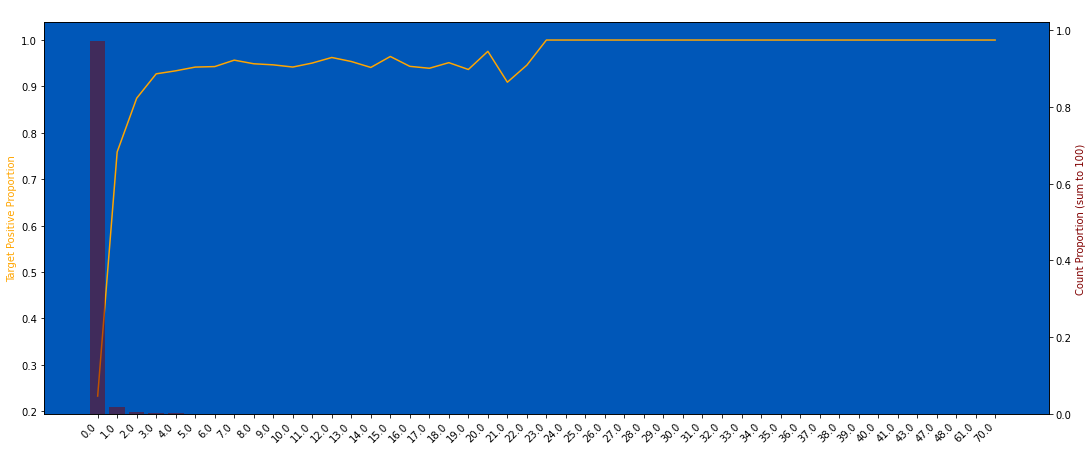

In [36]:
plot_target_check(train, "R_5", q=50, use_raw_bin=True, nunique_thr=15000, strfy_x=True, without_drop_tail=True)

In [37]:
%%time
train, test = fill_nans(train, test, col="R_5", tuple_of_values=(0), add_new_col=False)

CPU times: user 213 ms, sys: 742 ms, total: 955 ms
Wall time: 275 ms


5374133 null count, 0.972 null proportion
0.2324 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


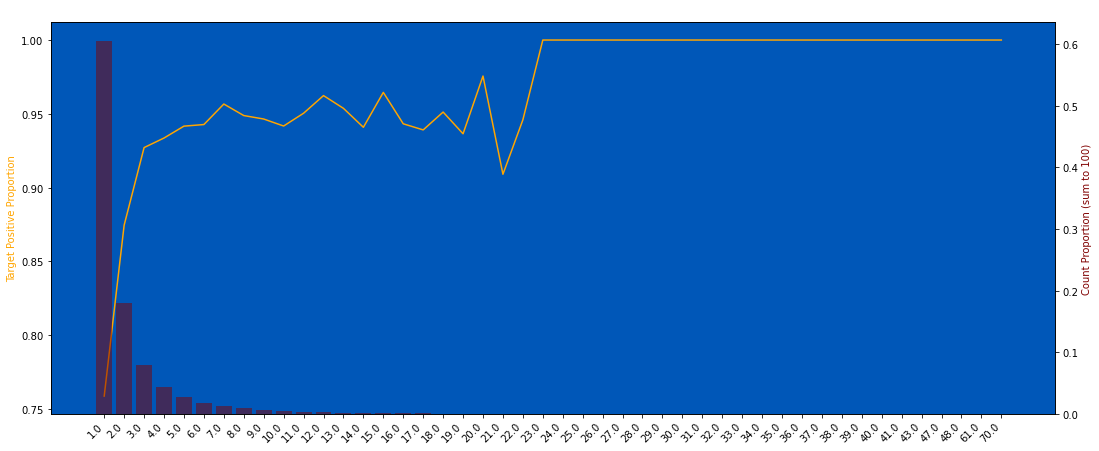

In [38]:
plot_target_check(train, "R_5", q=50, use_raw_bin=True, nunique_thr=15000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


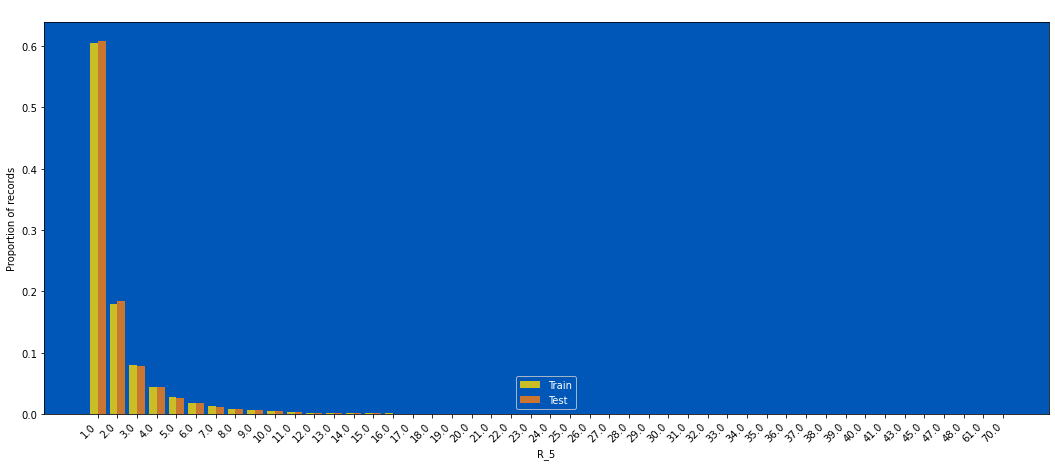

In [39]:
plot_train_test_distribution(train, test, "R_5", nunique_thr=100, without_drop_tail=True)

### R_6

0 null count, 0.000 null proportion
nan of the targets have label = 1


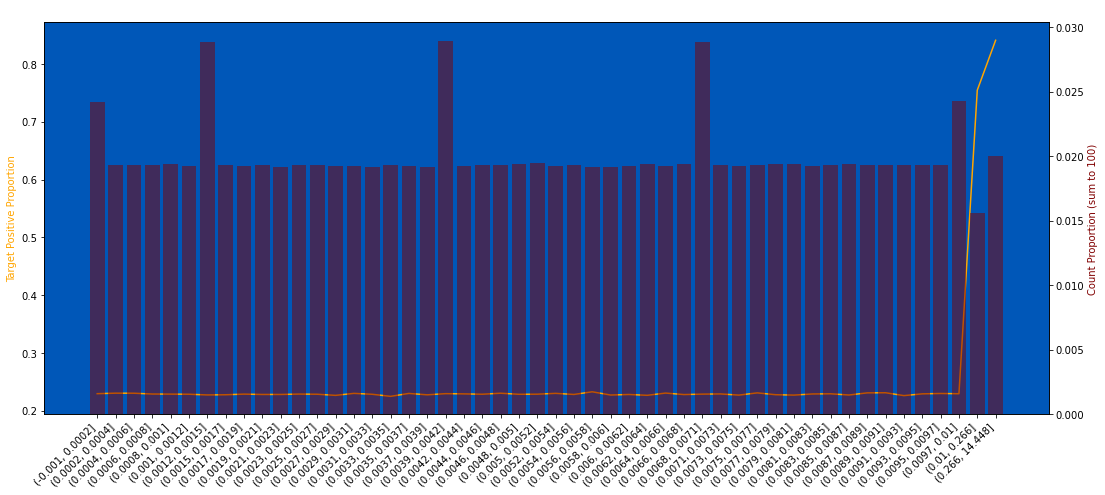

In [40]:
plot_target_check(train, "R_6", q=50, use_raw_bin=True)

In [41]:
%%time
train, test = round_dfs(train, test, col="R_6", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 259 ms, sys: 749 ms, total: 1.01 s
Wall time: 1.95 s


In [42]:
%%time
train, test = fill_nans(train, test, col="R_6", tuple_of_values=(0, 0.01), add_new_col=False)

CPU times: user 109 ms, sys: 88.5 ms, total: 198 ms
Wall time: 196 ms


5339841 null count, 0.965 null proportion
0.2290 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


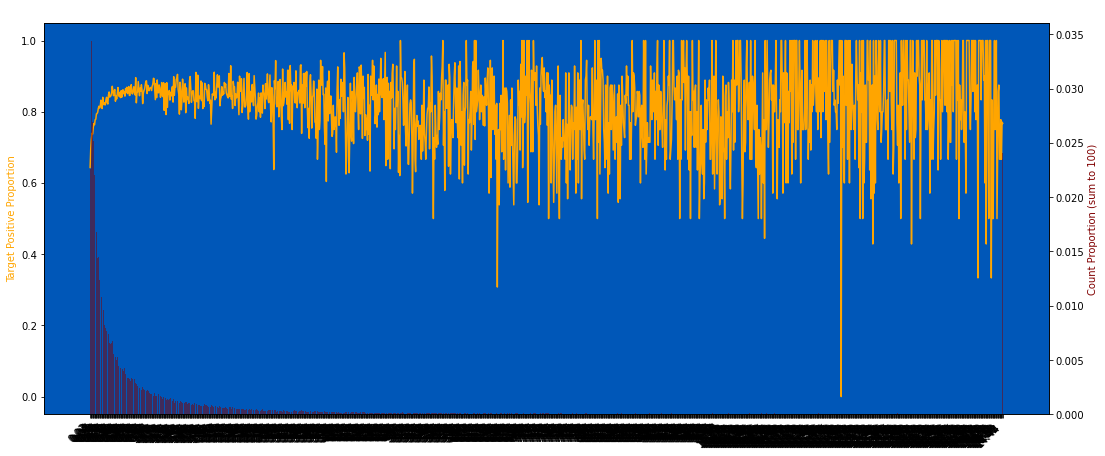

In [43]:
plot_target_check(train, "R_6", q=50, use_raw_bin=True, nunique_thr=2000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


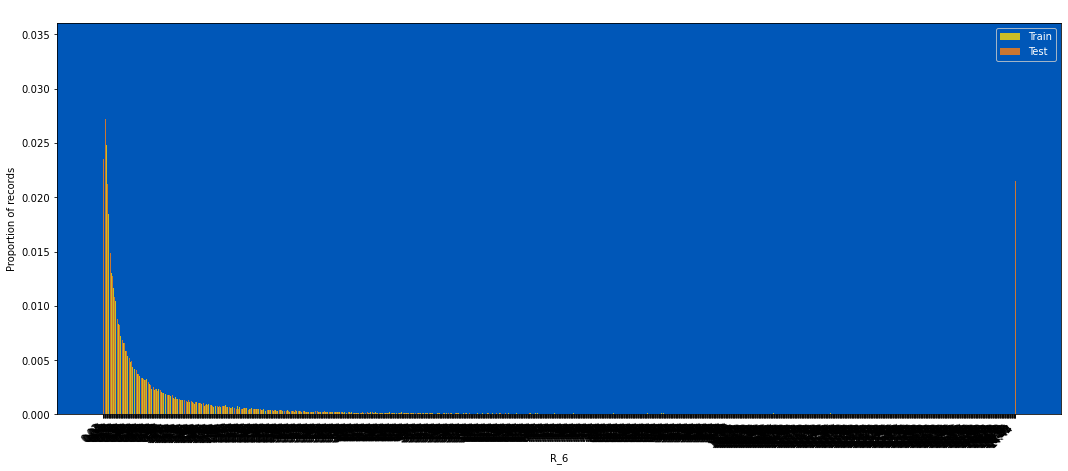

In [44]:
plot_train_test_distribution(train, test, "R_6", nunique_thr=5000)

### R_7

1 null count, 0.000 null proportion
1.0000 of the targets have label = 1


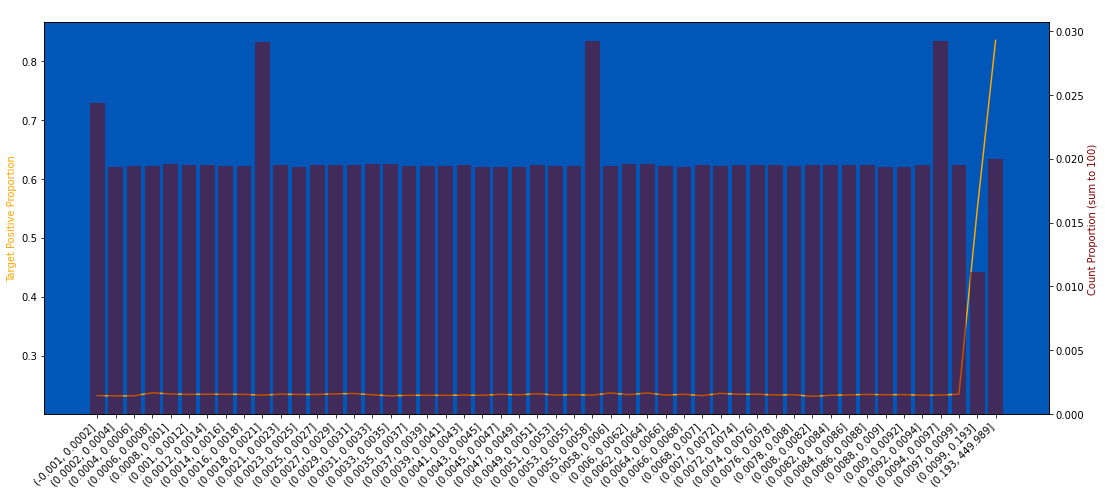

In [45]:
plot_target_check(train, "R_7", q=50, use_raw_bin=True, nunique_thr=200, strfy_x=True)

In [46]:
%%time
train, test = round_dfs(train, test, col="R_7", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 233 ms, sys: 729 ms, total: 963 ms
Wall time: 1.87 s


In [47]:
%%time
train, test = fill_nans(train, test, col="R_7", tuple_of_values=(0, 0.01), add_new_col=False)

CPU times: user 106 ms, sys: 81.5 ms, total: 188 ms
Wall time: 187 ms


5386331 null count, 0.974 null proportion
0.2336 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


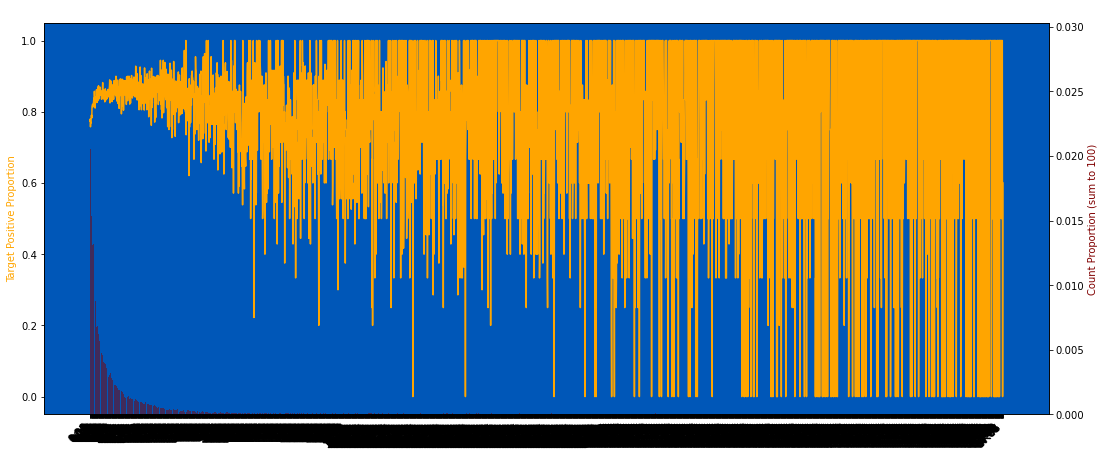

In [48]:
plot_target_check(train, "R_7", q=50, use_raw_bin=True, nunique_thr=20000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


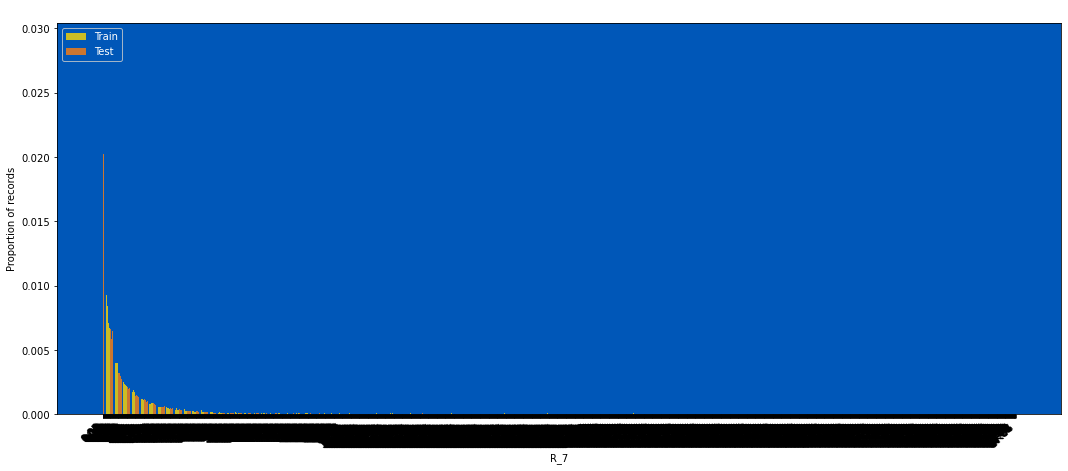

In [49]:
plot_train_test_distribution(train, test, "R_7", nunique_thr=20000)

### R_8

0 null count, 0.000 null proportion
nan of the targets have label = 1


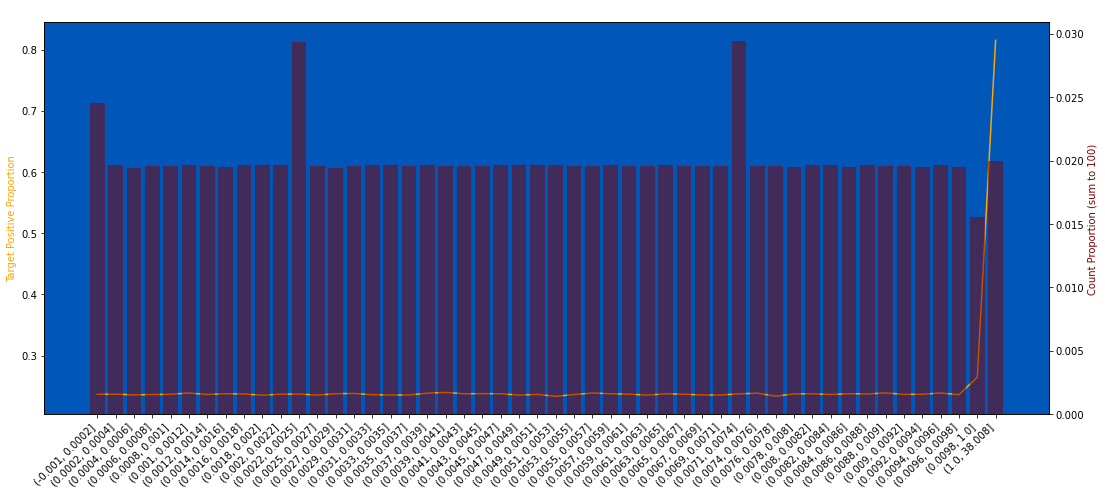

In [50]:
plot_target_check(train, "R_8", q=50, use_raw_bin=True)

In [51]:
%%time
train, test = round_dfs(train, test, col="R_8", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 232 ms, sys: 713 ms, total: 945 ms
Wall time: 1.85 s


In [52]:
%%time
train, test = fill_nans(train, test, col="R_8", tuple_of_values=(0), add_new_col=False)

CPU times: user 76.6 ms, sys: 67.7 ms, total: 144 ms
Wall time: 143 ms


5416683 null count, 0.979 null proportion
0.2371 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


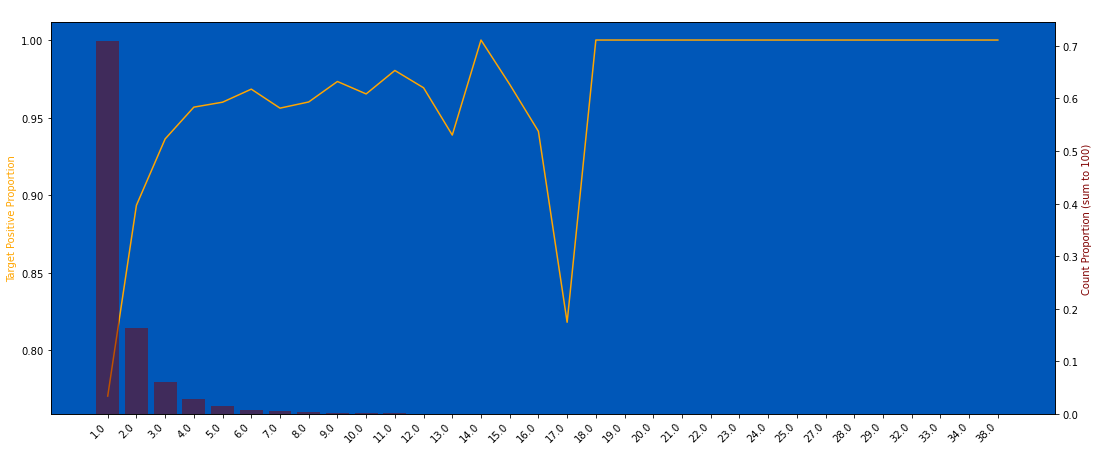

In [53]:
plot_target_check(train, "R_8", q=50, use_raw_bin=True, nunique_thr=30000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


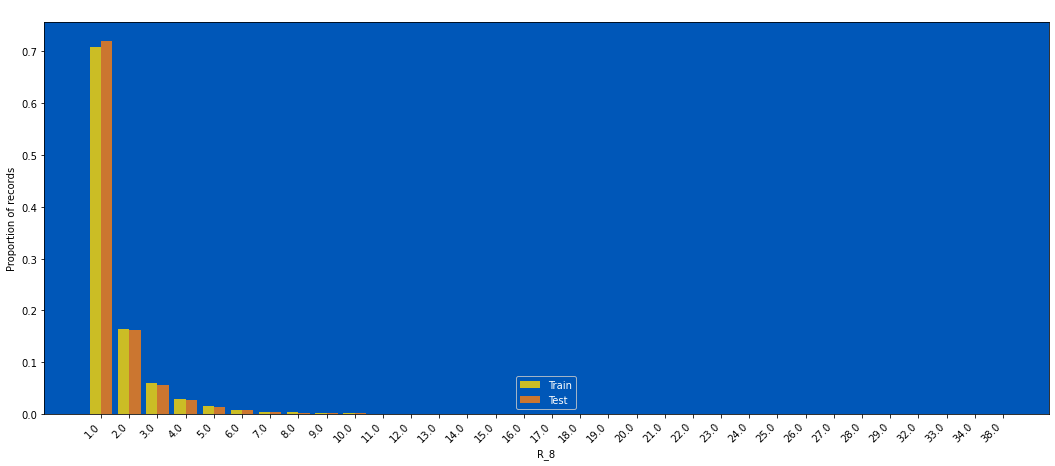

In [54]:
plot_train_test_distribution(train, test, "R_8", nunique_thr=100, without_drop_tail=True)

### R_9

5218918 null count, 0.943 null proportion
0.2293 of the targets have label = 1


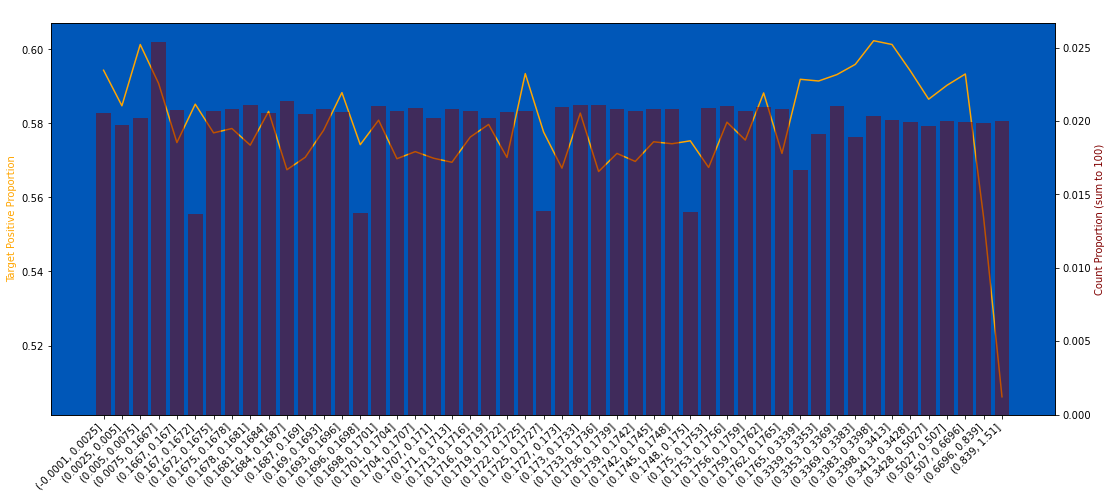

In [55]:
plot_target_check(train, "R_9", q=50, use_raw_bin=True)

In [56]:
%%time
train, test = round_dfs(train, test, col="R_9", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 233 ms, sys: 678 ms, total: 911 ms
Wall time: 2 s


5218918 null count, 0.943 null proportion
0.2293 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


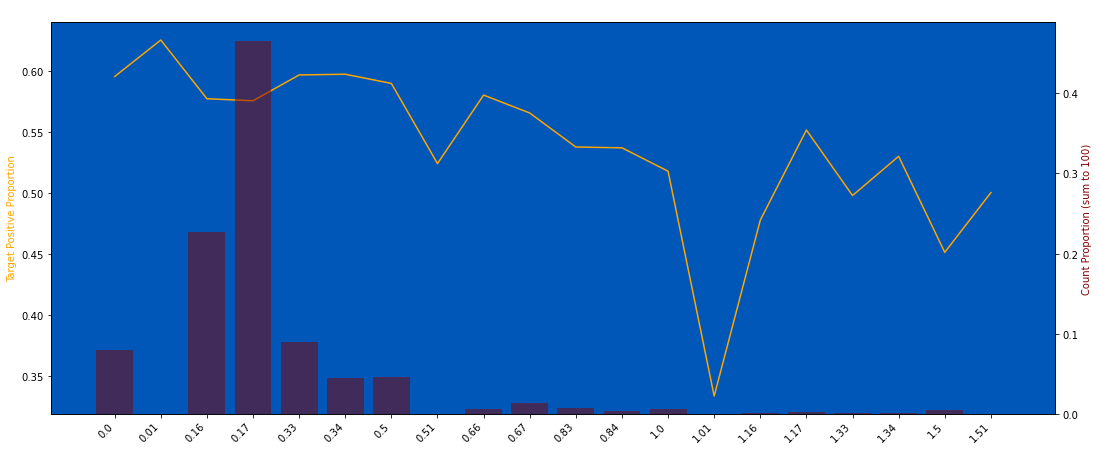

In [57]:
plot_target_check(train, "R_9", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

In [58]:
train["R_9"] *= 6
test["R_9"] *= 6

In [59]:
train, test = round_dfs(train, test, col="R_9", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [60]:
train["R_9"] = train["R_9"].parallel_apply(lambda x: x + 0.1 if abs(x % 1 - 0.9) < 1e-3 else x)
test["R_9"] = test["R_9"].parallel_apply(lambda x: x + 0.1 if abs(x % 1 - 0.9) < 1e-3 else x)

5218918 null count, 0.943 null proportion
0.2293 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


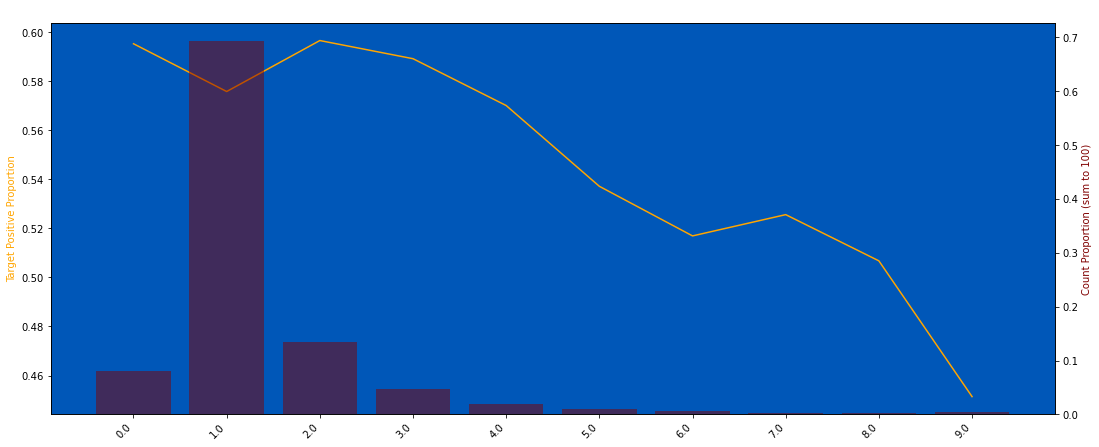

In [61]:
plot_target_check(train, "R_9", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


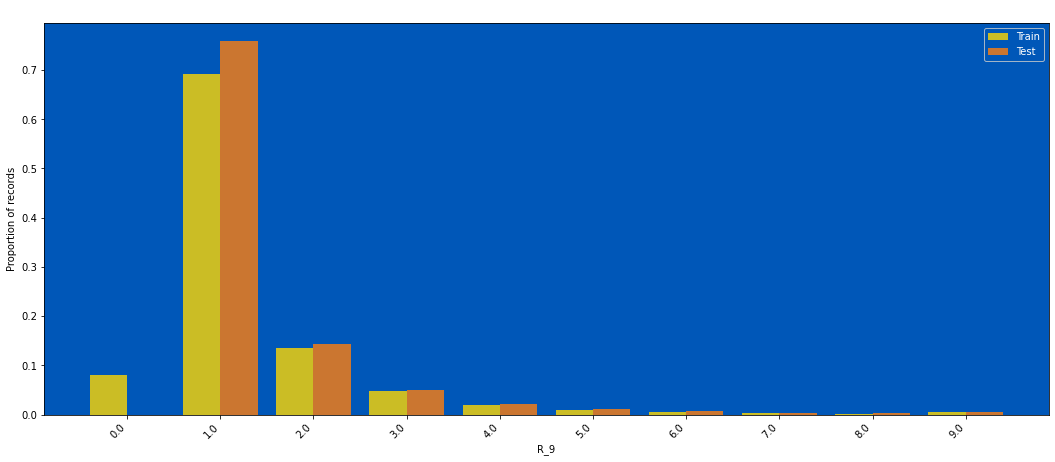

In [62]:
plot_train_test_distribution(train, test, "R_9", nunique_thr=100, without_drop_tail=True)

### R_10

0 null count, 0.000 null proportion
nan of the targets have label = 1


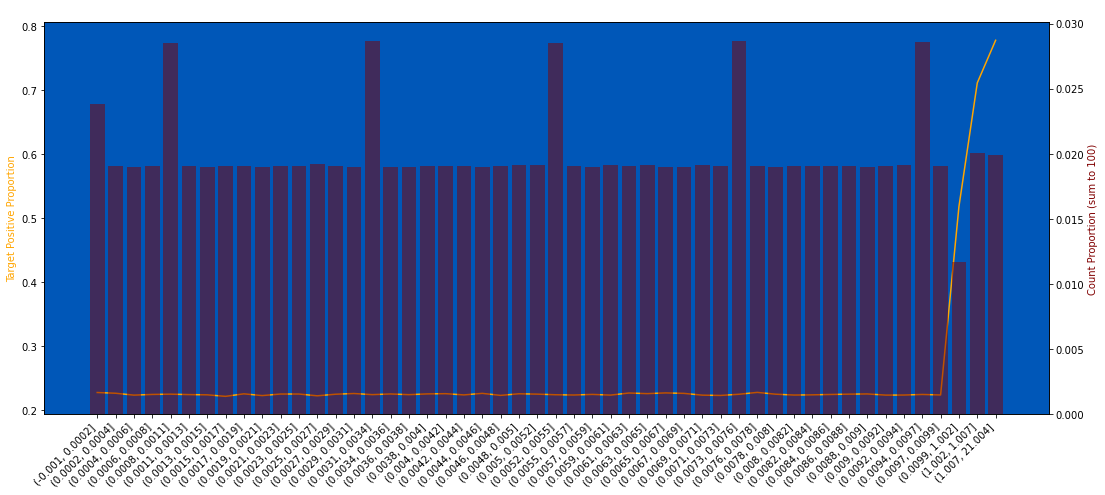

In [63]:
plot_target_check(train, "R_10", q=50, use_raw_bin=True)

In [64]:
%%time
train, test = round_dfs(train, test, col="R_10", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 263 ms, sys: 746 ms, total: 1.01 s
Wall time: 1.91 s


In [65]:
%%time
train, test = fill_nans(train, test, col="R_10", tuple_of_values=(0), add_new_col=False)

CPU times: user 76.5 ms, sys: 58.1 ms, total: 135 ms
Wall time: 134 ms


5271789 null count, 0.953 null proportion
0.2249 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


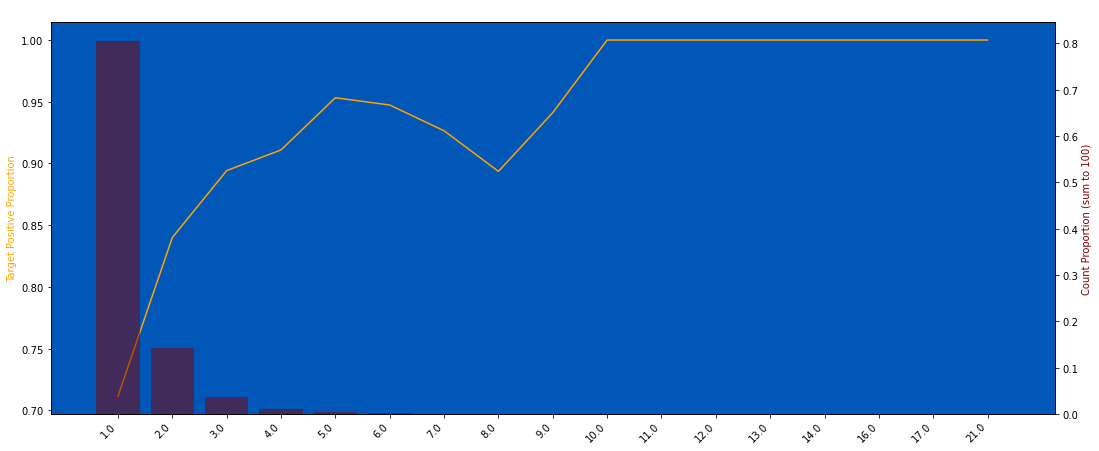

In [66]:
plot_target_check(train, "R_10", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


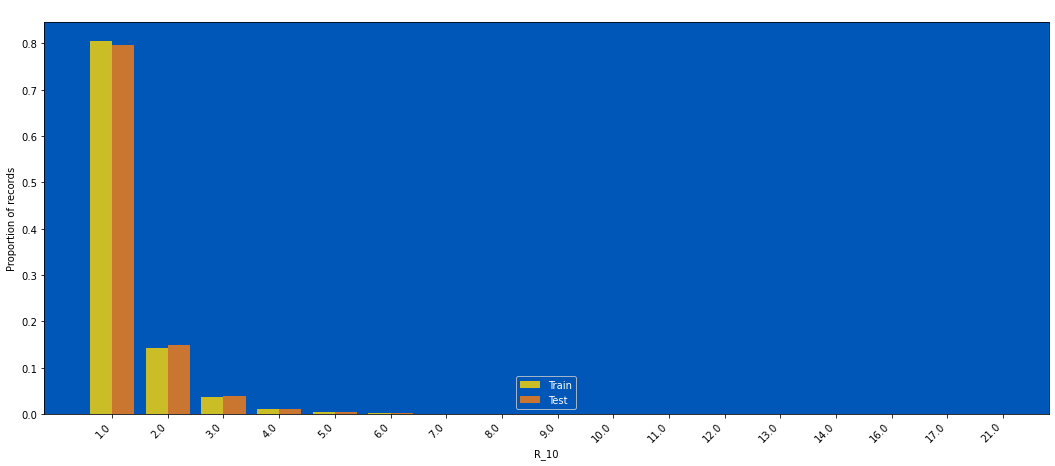

In [67]:
plot_train_test_distribution(train, test, "R_10", nunique_thr=100, without_drop_tail=True)

### R_11

0 null count, 0.000 null proportion
nan of the targets have label = 1


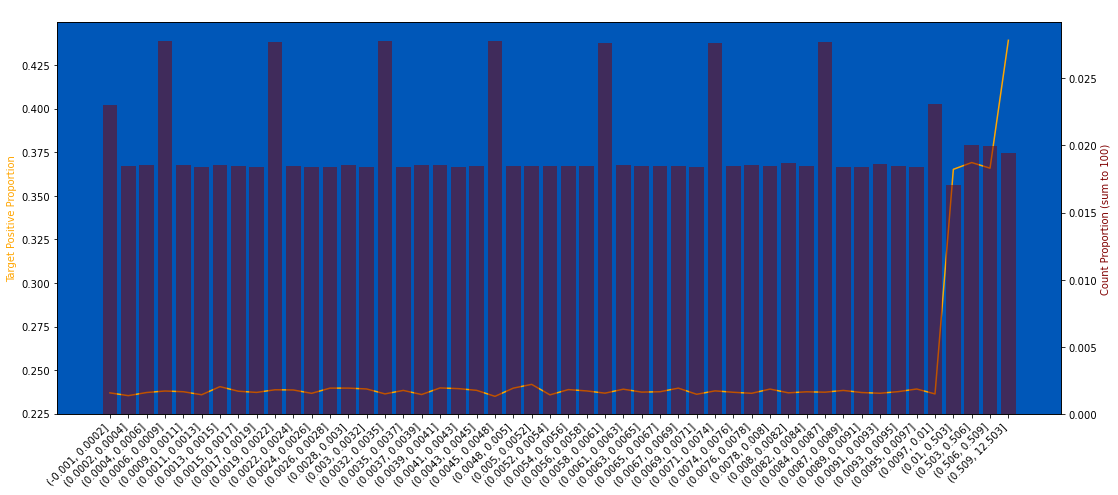

In [68]:
plot_target_check(train, "R_11", q=50, use_raw_bin=True)

In [69]:
%%time
train, test = round_dfs(train, test, col="R_11", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 227 ms, sys: 722 ms, total: 949 ms
Wall time: 1.84 s


In [70]:
train["R_11"] *= 2
test["R_11"] *= 2

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


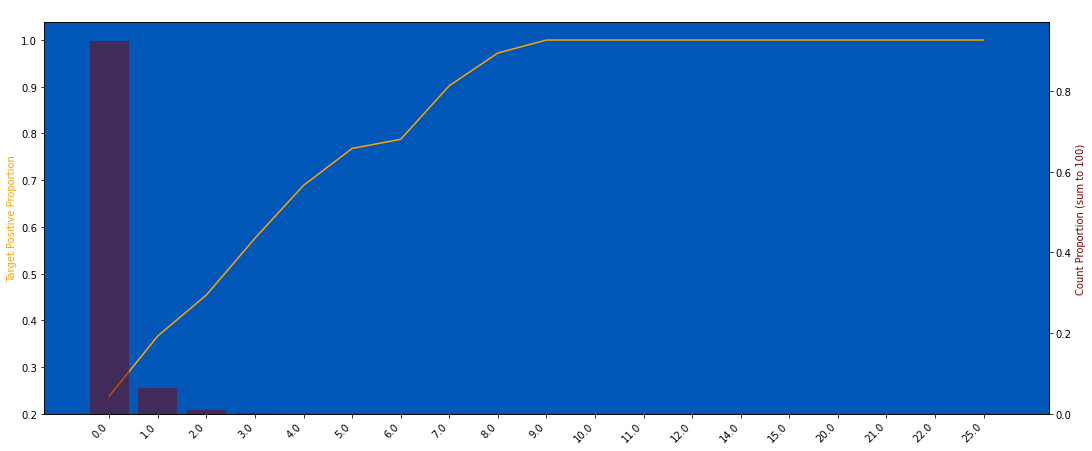

In [71]:
plot_target_check(train, "R_11", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


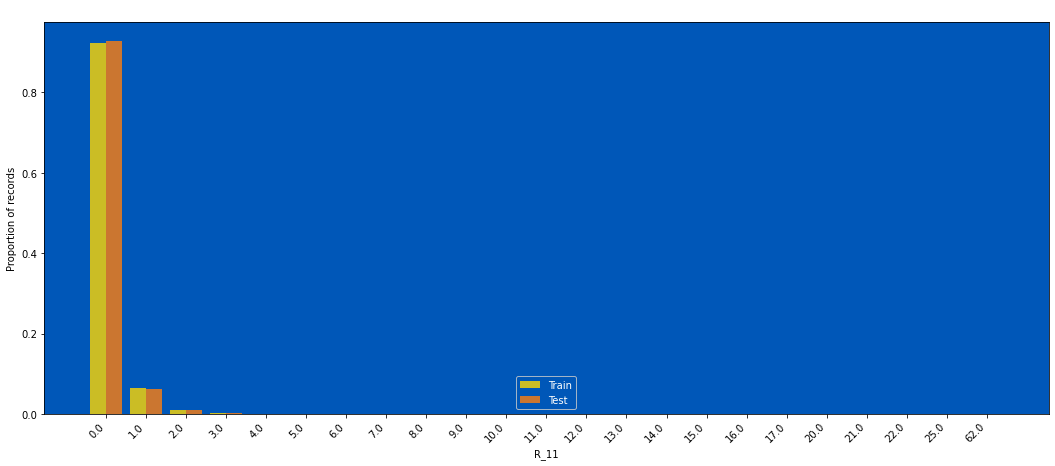

In [72]:
plot_train_test_distribution(train, test, "R_11", nunique_thr=100, without_drop_tail=True)

### R_12

56 null count, 0.000 null proportion
0.2500 of the targets have label = 1


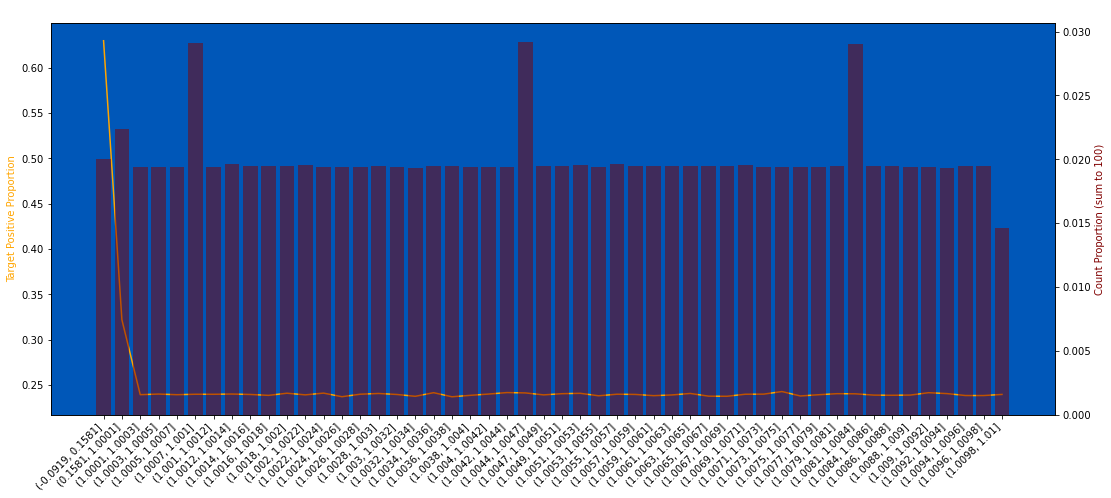

In [73]:
plot_target_check(train, "R_12", q=50, use_raw_bin=True, strfy_x=True, nunique_thr=1000)

In [74]:
%%time
train, test = round_dfs(train, test, col="R_12", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 251 ms, sys: 747 ms, total: 998 ms
Wall time: 1.9 s


In [75]:
%%time
train, test = fill_nans(train, test, col="R_12", tuple_of_values=(1, 1.01), add_new_col=False)

CPU times: user 107 ms, sys: 85.3 ms, total: 192 ms
Wall time: 191 ms


5377465 null count, 0.972 null proportion
0.2394 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


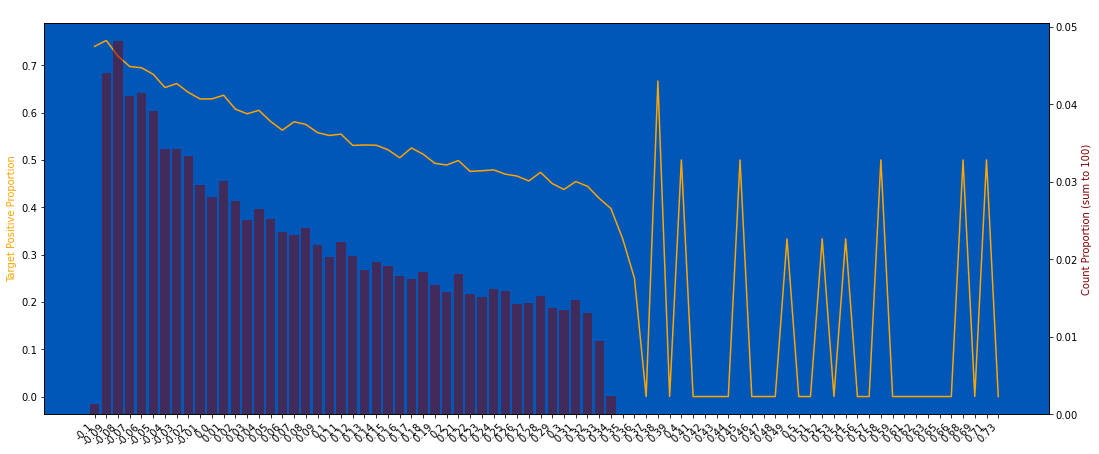

In [76]:
plot_target_check(train, "R_12", q=50, use_raw_bin=True, strfy_x=True, nunique_thr=1000, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


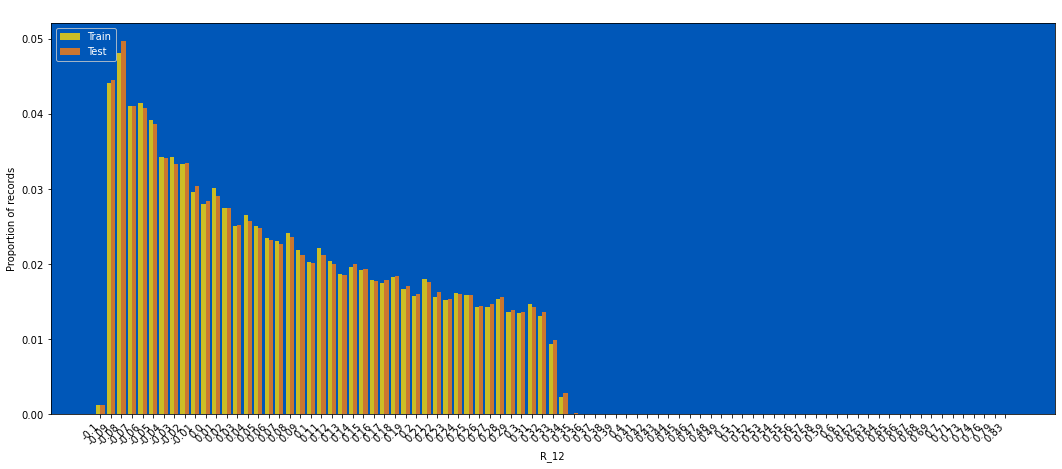

In [77]:
plot_train_test_distribution(train, test, "R_12", nunique_thr=100, without_drop_tail=True)

### R_13

0 null count, 0.000 null proportion
nan of the targets have label = 1


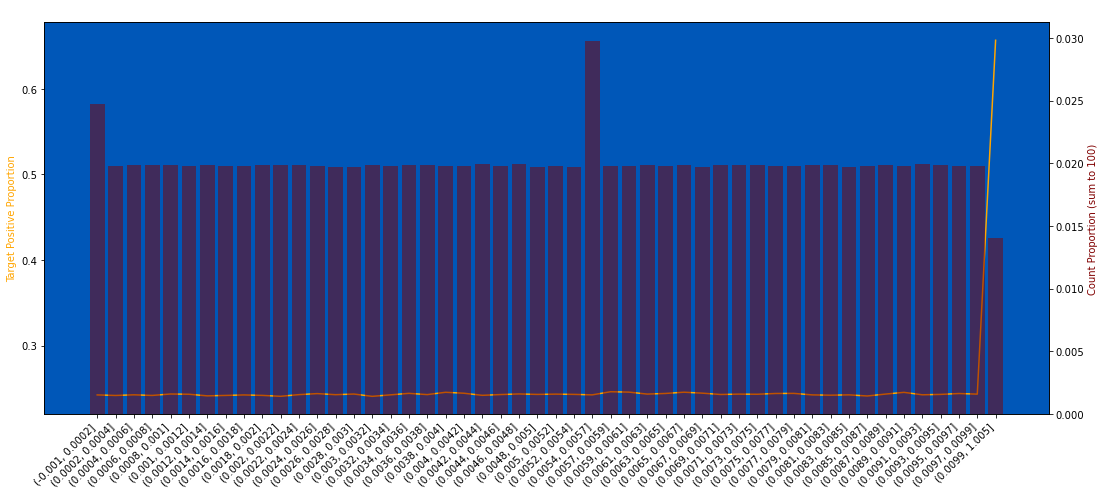

In [78]:
plot_target_check(train, "R_13", q=50, use_raw_bin=True, nunique_thr=29, strfy_x=True)

In [79]:
%%time
train, test = round_dfs(train, test, col="R_13", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 217 ms, sys: 688 ms, total: 905 ms
Wall time: 1.85 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


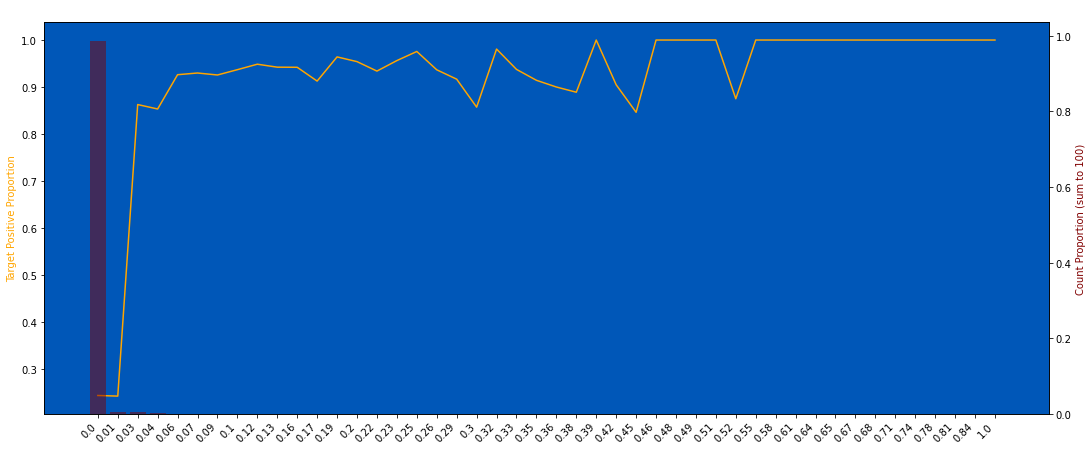

In [80]:
plot_target_check(train, "R_13", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

In [81]:
%%time
train, test = fill_nans(train, test, col="R_13", tuple_of_values=(0, 0.01), add_new_col=False)

CPU times: user 250 ms, sys: 734 ms, total: 984 ms
Wall time: 346 ms


5481116 null count, 0.991 null proportion
0.2433 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


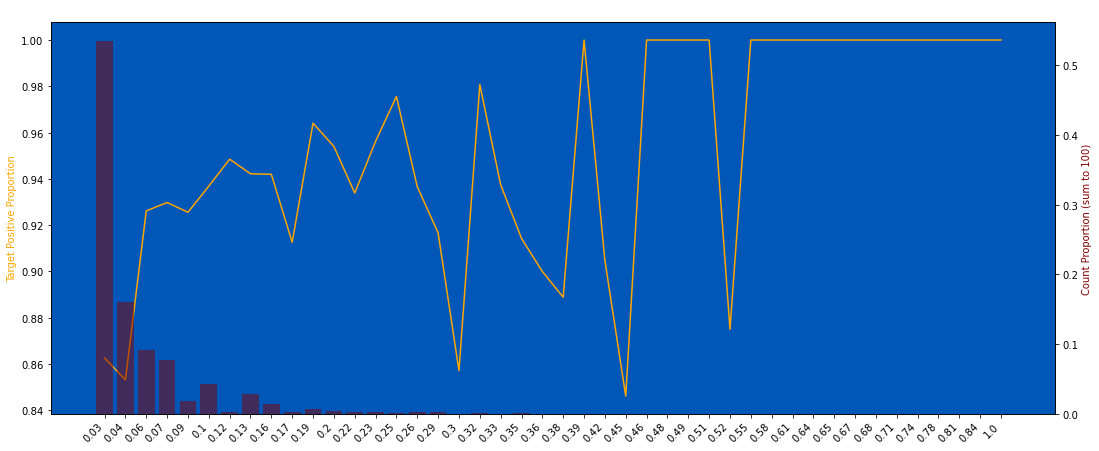

In [82]:
plot_target_check(train, "R_13", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


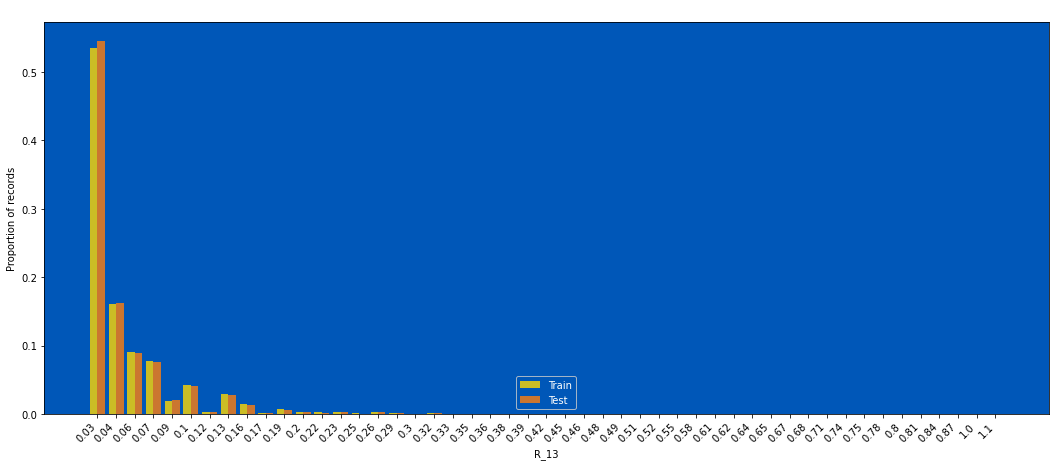

In [83]:
plot_train_test_distribution(train, test, "R_13", nunique_thr=100, without_drop_tail=True)

### R_14

1 null count, 0.000 null proportion
1.0000 of the targets have label = 1


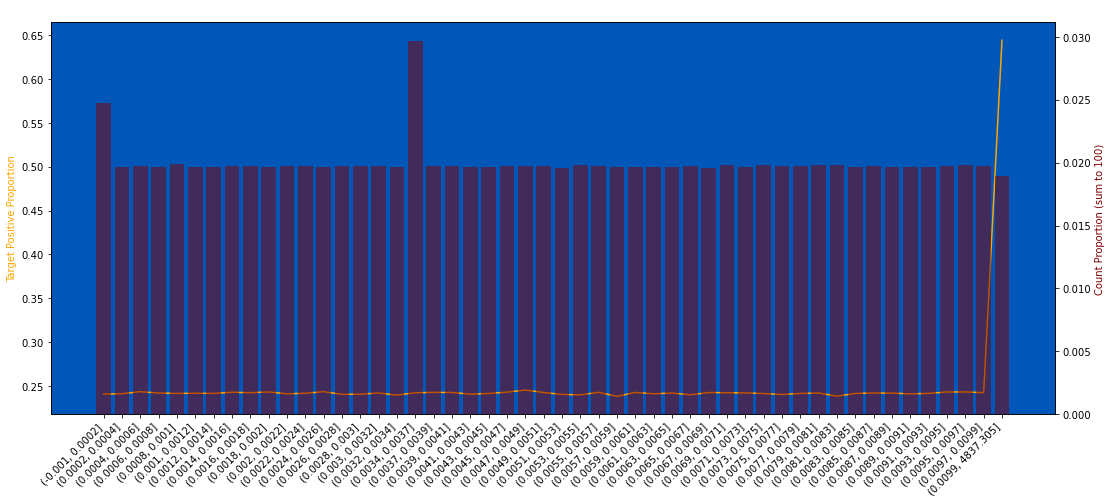

In [84]:
plot_target_check(train, "R_14", q=50, use_raw_bin=True)

In [85]:
%%time
train, test = round_dfs(train, test, col="R_14", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 248 ms, sys: 735 ms, total: 983 ms
Wall time: 1.94 s


1 null count, 0.000 null proportion
1.0000 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


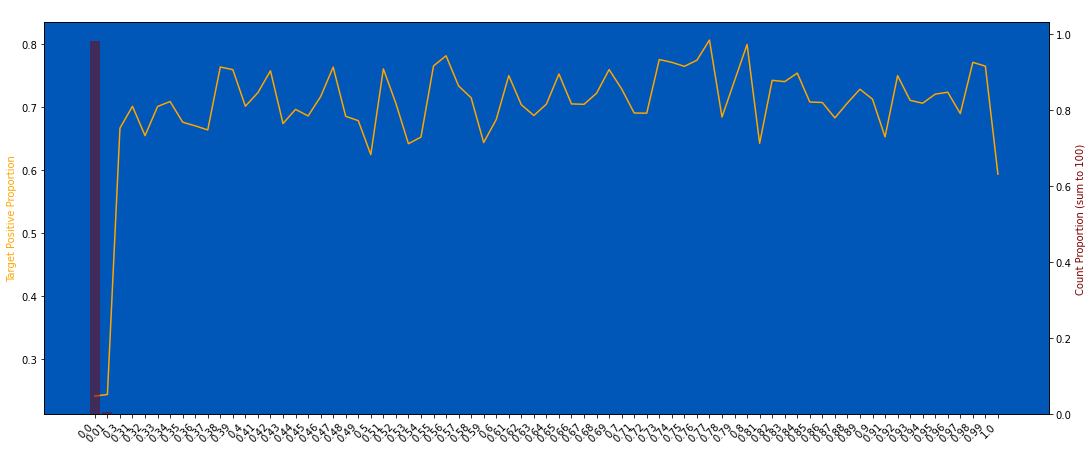

In [86]:
plot_target_check(train, "R_14", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True)

In [87]:
%%time
train, test = fill_nans(train, test, col="R_14", tuple_of_values=(0, 0.01), add_new_col=False)

CPU times: user 163 ms, sys: 193 ms, total: 356 ms
Wall time: 355 ms


5453804 null count, 0.986 null proportion
0.2415 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


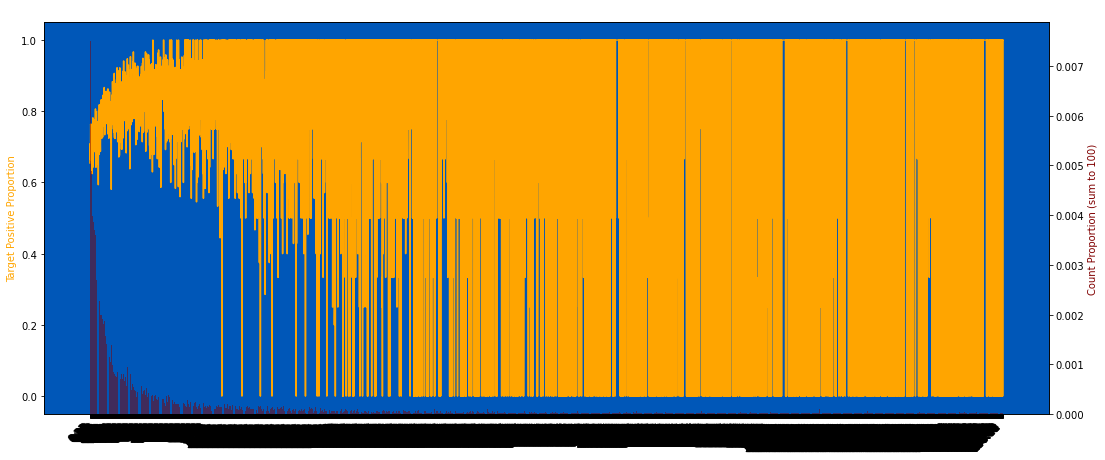

In [88]:
plot_target_check(train, "R_14", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


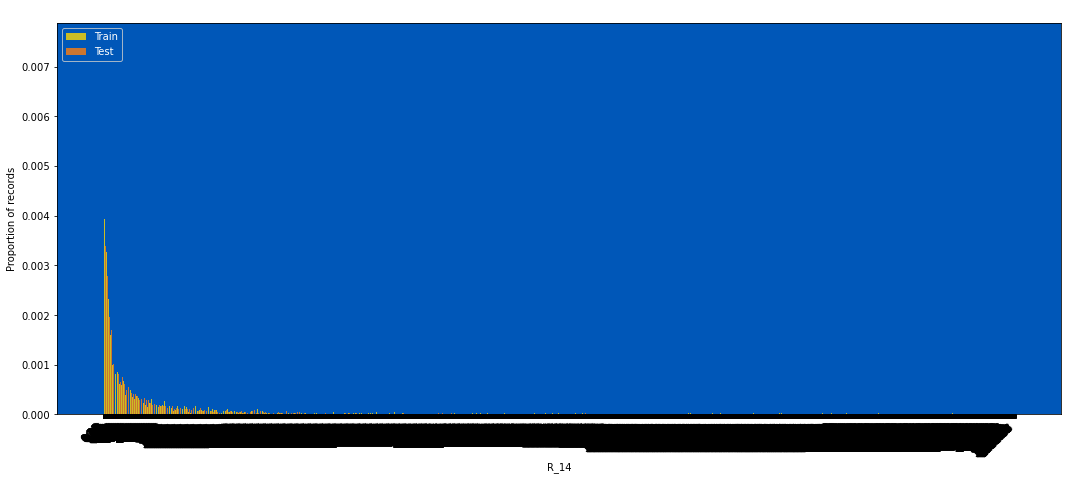

In [89]:
plot_train_test_distribution(train, test, "R_14", nunique_thr=50000, without_drop_tail=True)

### R_15

0 null count, 0.000 null proportion
nan of the targets have label = 1


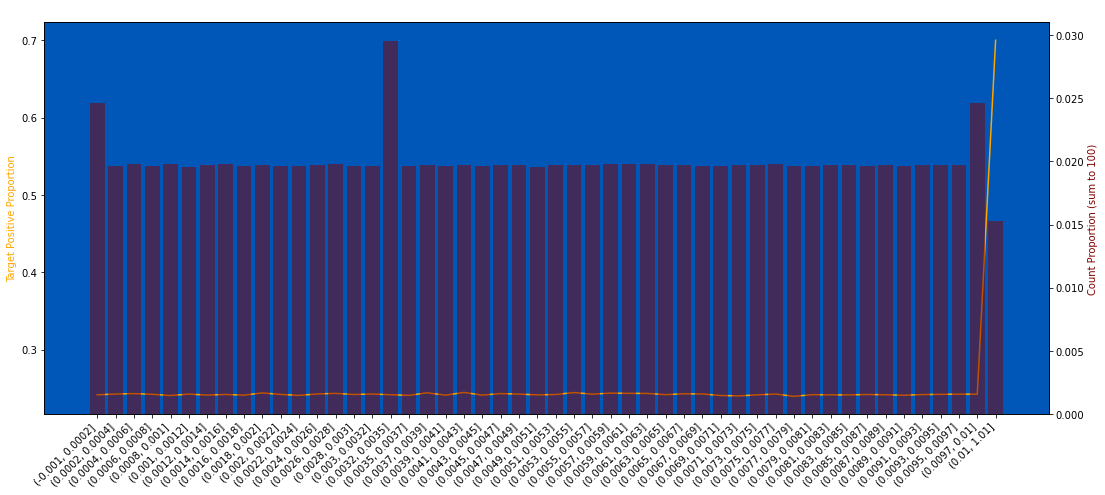

In [90]:
plot_target_check(train, "R_15", q=50, use_raw_bin=True)

In [91]:
%%time
train, test = round_dfs(train, test, col="R_15", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 237 ms, sys: 814 ms, total: 1.05 s
Wall time: 1.97 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


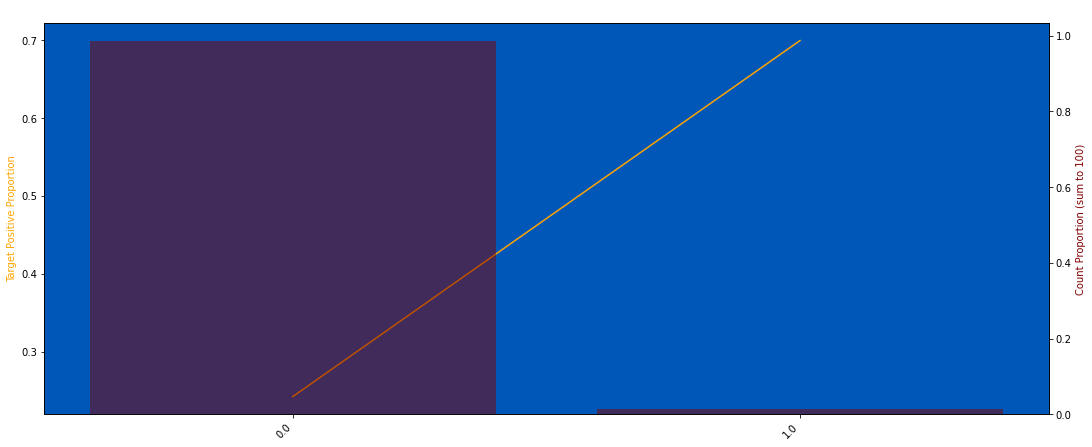

In [92]:
plot_target_check(train, "R_15", q=50, use_raw_bin=True, nunique_thr=5, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


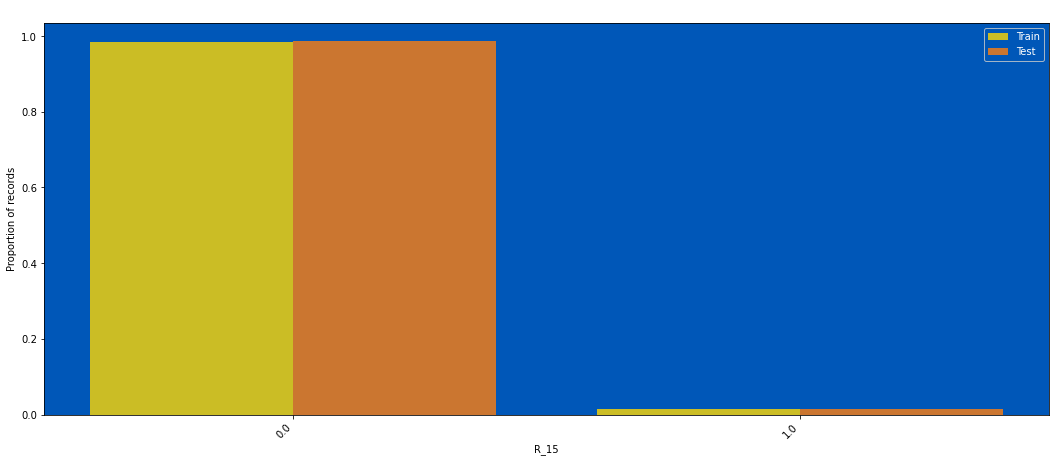

In [93]:
plot_train_test_distribution(train, test, "R_15", nunique_thr=50000, without_drop_tail=True)

### R_16

0 null count, 0.000 null proportion
nan of the targets have label = 1


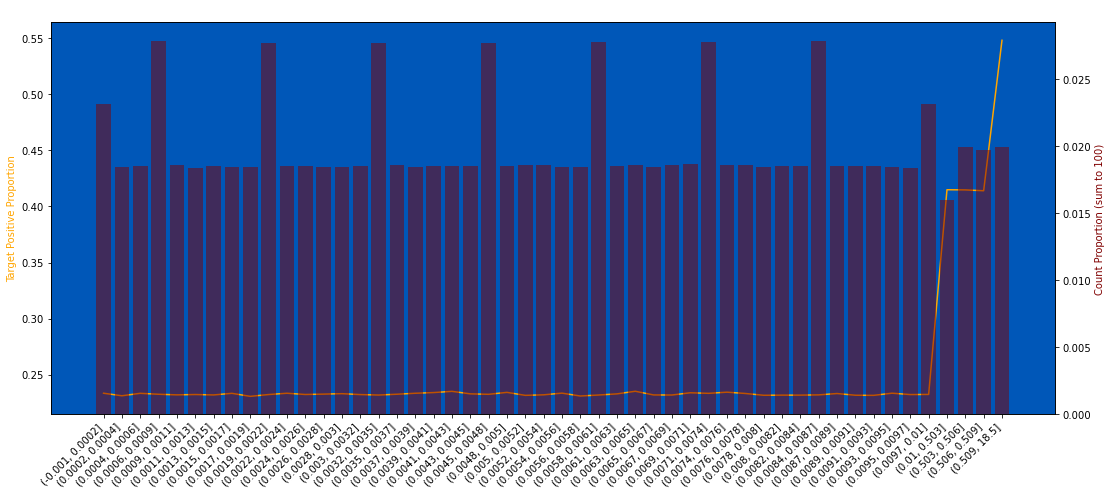

In [94]:
plot_target_check(train, "R_16", q=50, use_raw_bin=True)

In [95]:
%%time
train, test = round_dfs(train, test, col="R_16", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 247 ms, sys: 714 ms, total: 961 ms
Wall time: 1.89 s


In [96]:
train["R_16"] *= 2
test["R_16"] *= 2

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


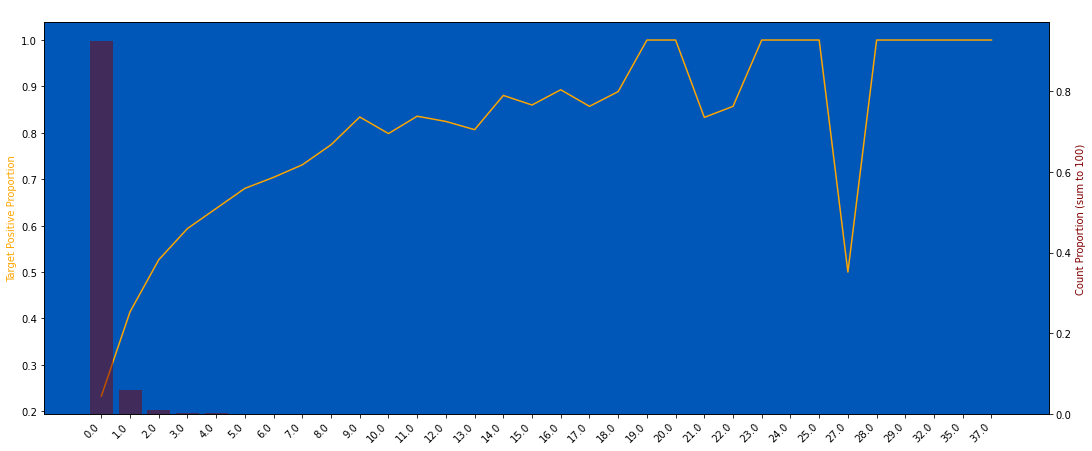

In [97]:
plot_target_check(train, "R_16", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


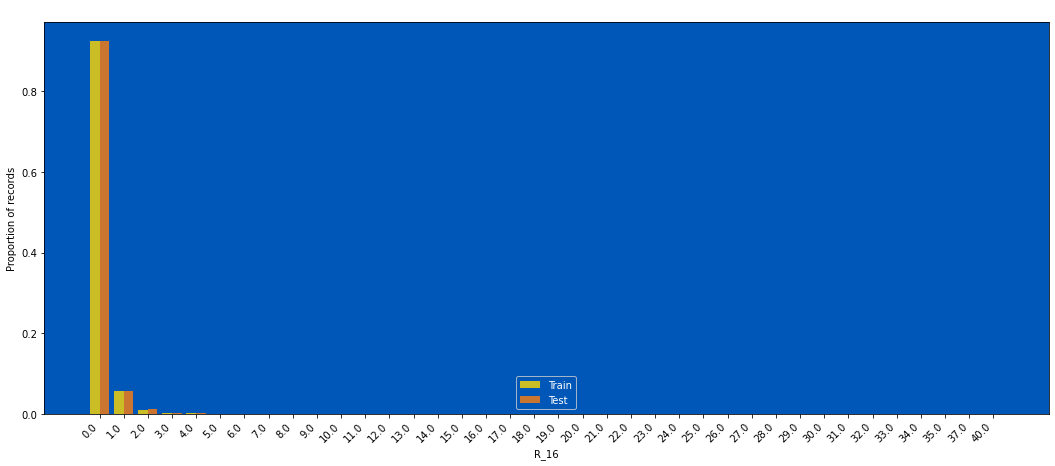

In [98]:
plot_train_test_distribution(train, test, "R_16", nunique_thr=50000, without_drop_tail=True)

### R_17

0 null count, 0.000 null proportion
nan of the targets have label = 1


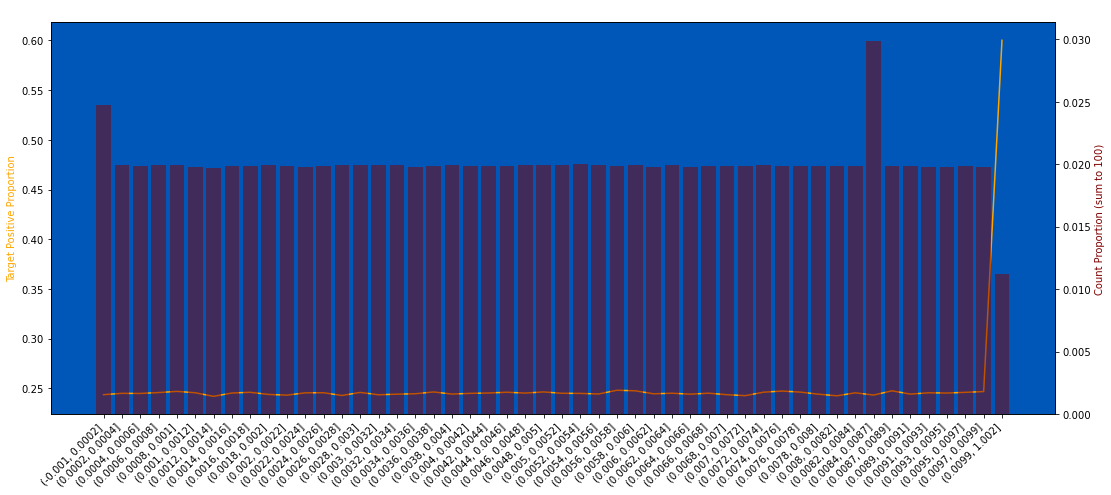

In [99]:
plot_target_check(train, "R_17", q=50, use_raw_bin=True, nunique_thr=26)

In [100]:
%%time
train, test = round_dfs(train, test, col="R_17", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 235 ms, sys: 743 ms, total: 978 ms
Wall time: 1.9 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


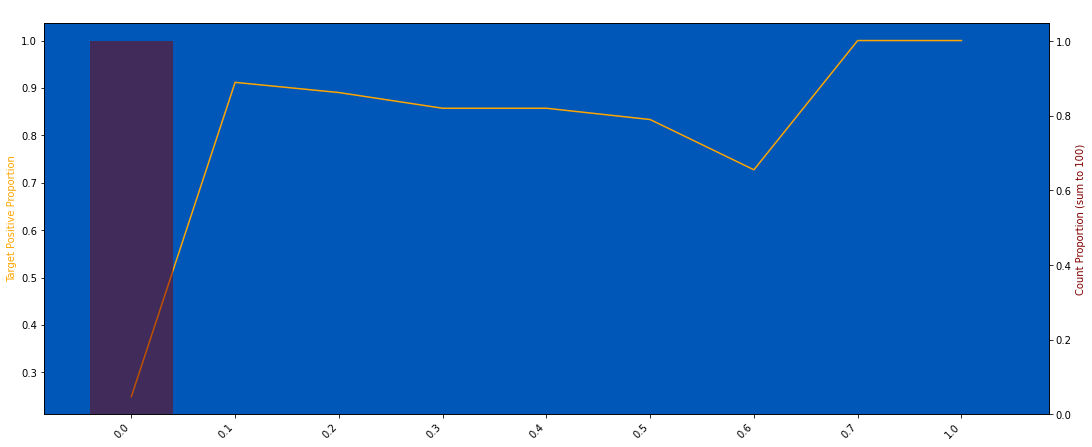

In [101]:
plot_target_check(train, "R_17", q=50, use_raw_bin=True, nunique_thr=100, strfy_x=True, without_drop_tail=True)

In [102]:
%%time
train, test = fill_nans(train, test, col="R_17", tuple_of_values=(0), add_new_col=False)

CPU times: user 654 ms, sys: 798 ms, total: 1.45 s
Wall time: 299 ms


5528064 null count, 0.999 null proportion
0.2487 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


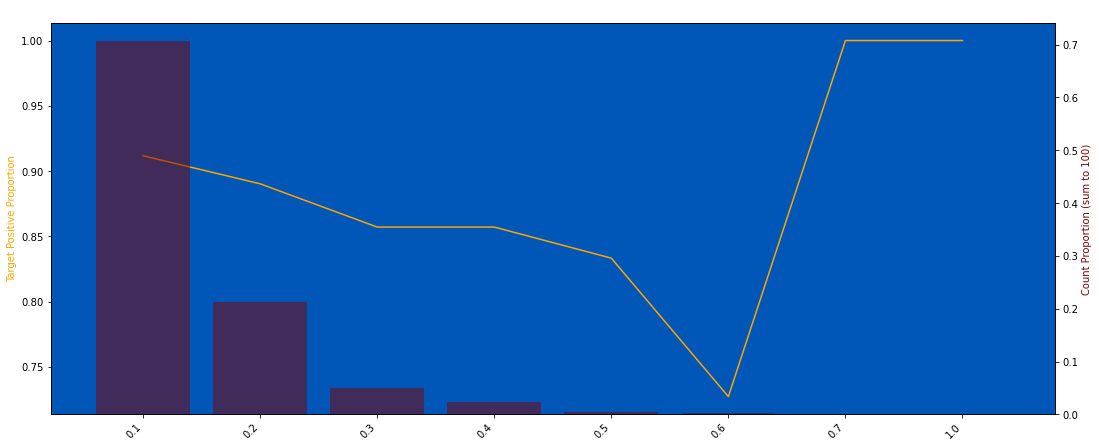

In [103]:
plot_target_check(train, "R_17", q=50, use_raw_bin=True, nunique_thr=100, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


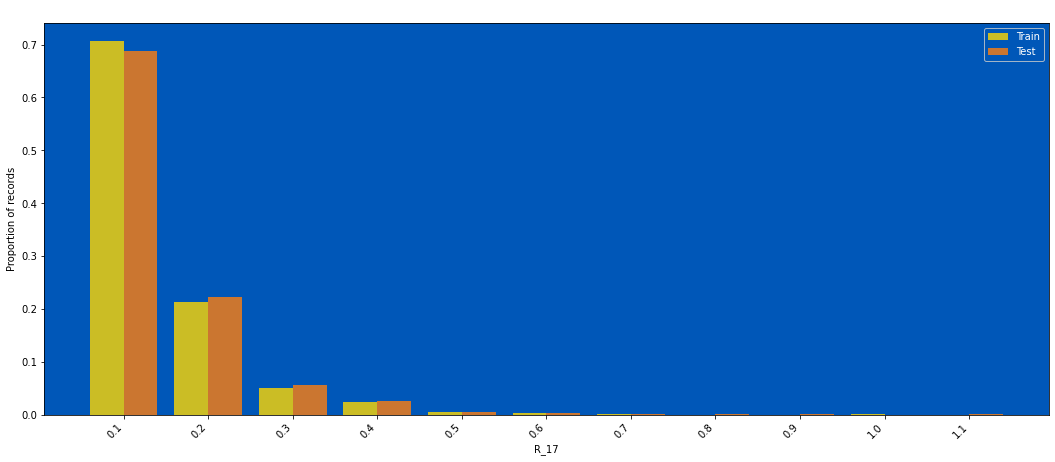

In [104]:
plot_train_test_distribution(train, test, "R_17", nunique_thr=50000, without_drop_tail=True)

### R_18

0 null count, 0.000 null proportion
nan of the targets have label = 1


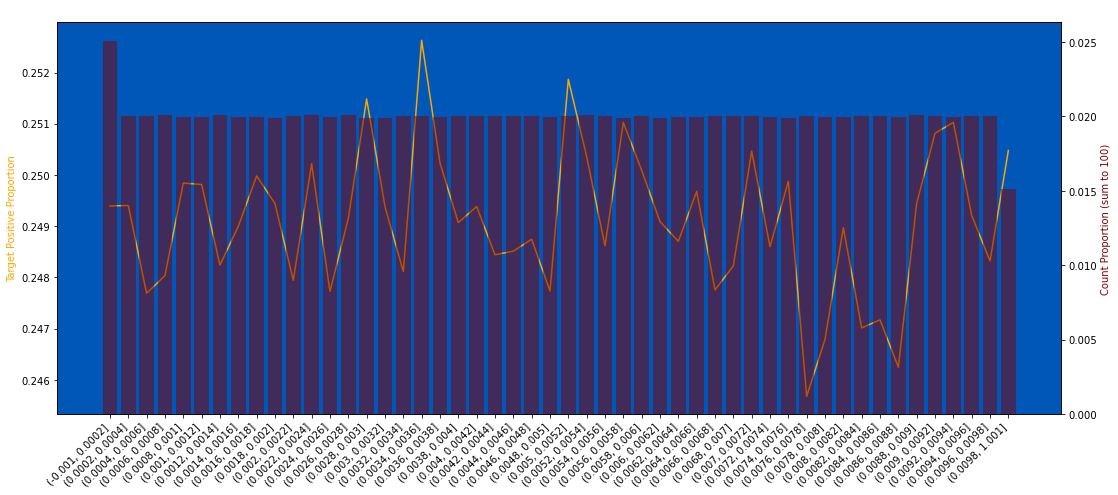

In [105]:
plot_target_check(train, "R_18", q=50, use_raw_bin=True)

In [106]:
%%time
train, test = round_dfs(train, test, col="R_18", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 240 ms, sys: 695 ms, total: 934 ms
Wall time: 1.86 s


In [107]:
train = train.drop(columns="R_18", errors="ignore")
test = test.drop(columns="R_18", errors="ignore")

### R_19

0 null count, 0.000 null proportion
nan of the targets have label = 1


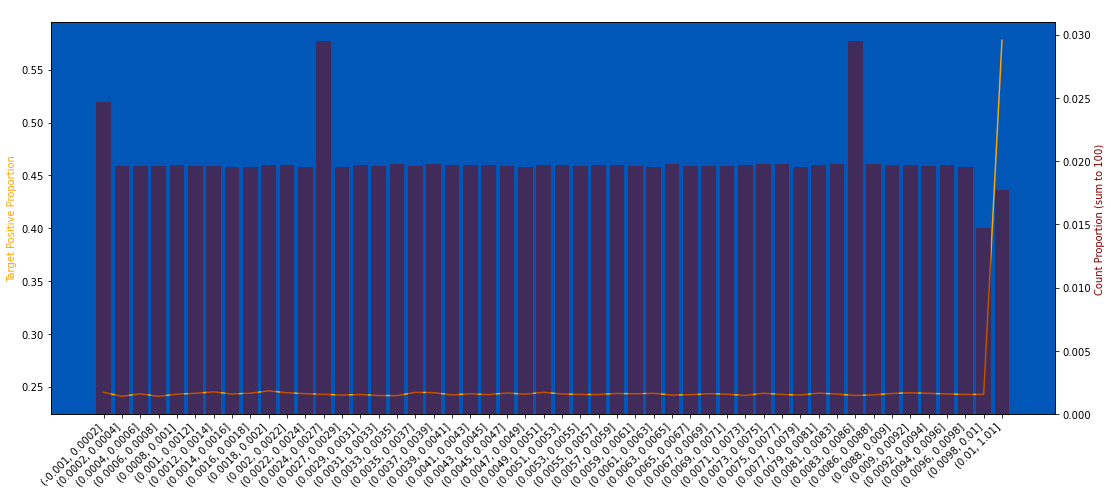

In [108]:
plot_target_check(train, "R_19", q=50, use_raw_bin=True, nunique_thr=20)

In [109]:
%%time
train, test = round_dfs(train, test, col="R_19", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 227 ms, sys: 808 ms, total: 1.03 s
Wall time: 2 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


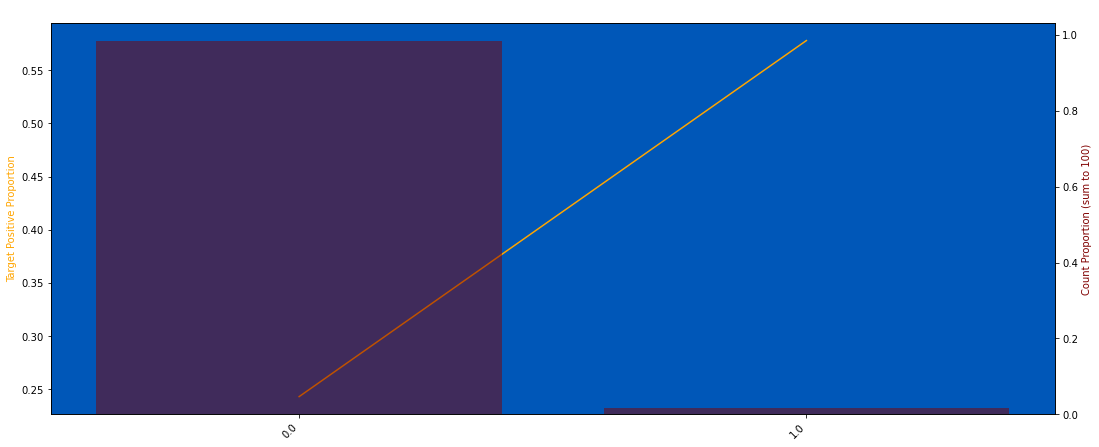

In [110]:
plot_target_check(train, "R_19", q=50, use_raw_bin=True, nunique_thr=4, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


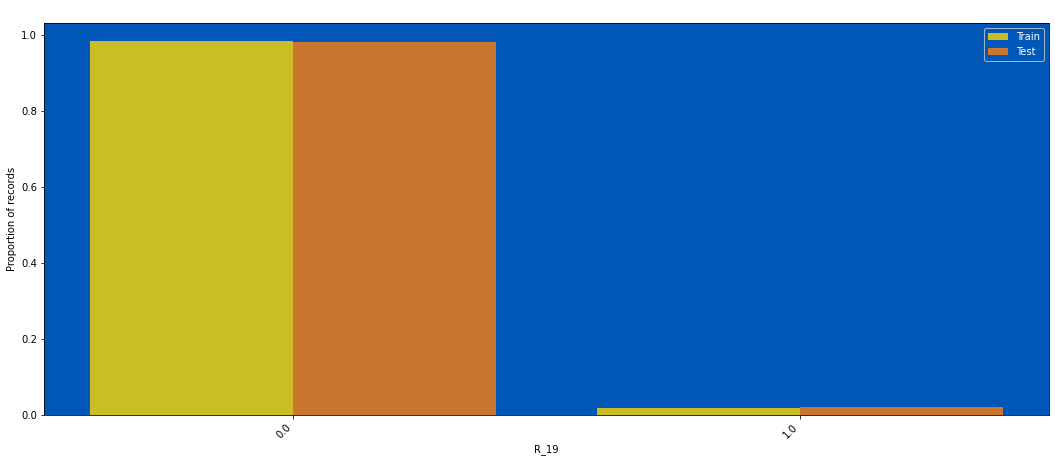

In [111]:
plot_train_test_distribution(train, test, "R_19", nunique_thr=500, without_drop_tail=True)

### R_20

75 null count, 0.000 null proportion
0.2667 of the targets have label = 1


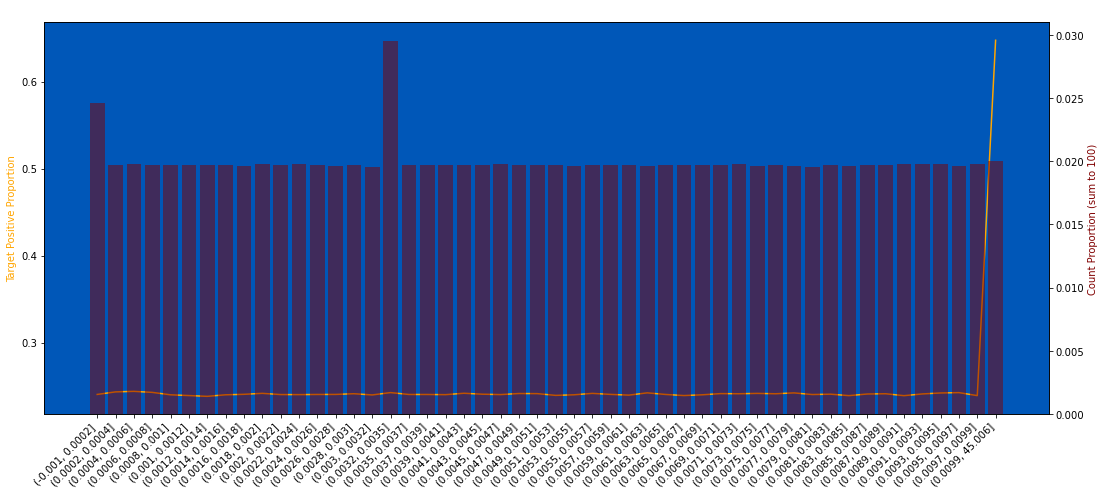

In [112]:
plot_target_check(train, "R_20", q=50, use_raw_bin=True)

In [113]:
%%time
train, test = round_dfs(train, test, col="R_20", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 237 ms, sys: 725 ms, total: 962 ms
Wall time: 1.91 s


In [114]:
%%time
train, test = fill_nans(train, test, col="R_20", tuple_of_values=(0), add_new_col=False)

CPU times: user 76 ms, sys: 66.5 ms, total: 142 ms
Wall time: 141 ms


5448123 null count, 0.985 null proportion
0.2410 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


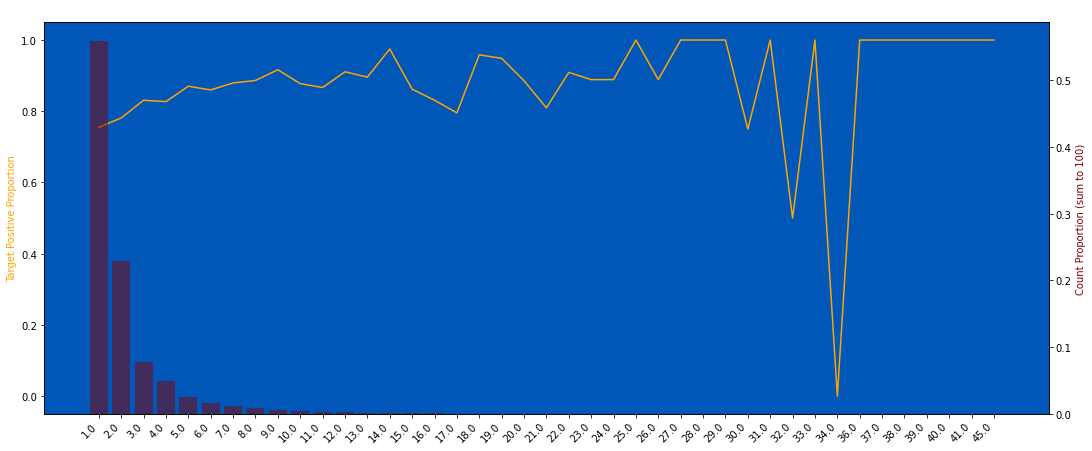

In [115]:
plot_target_check(train, "R_20", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


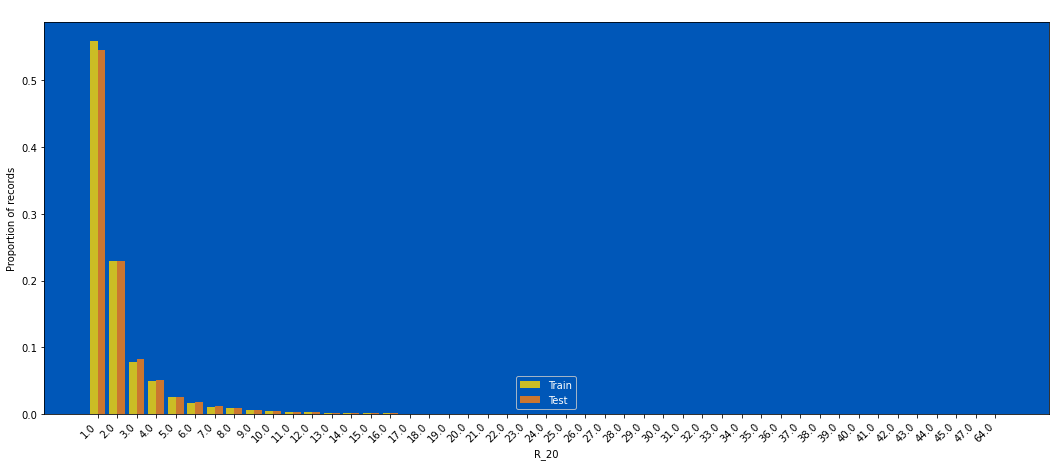

In [116]:
plot_train_test_distribution(train, test, "R_20", nunique_thr=500, without_drop_tail=True)

### R_21

0 null count, 0.000 null proportion
nan of the targets have label = 1


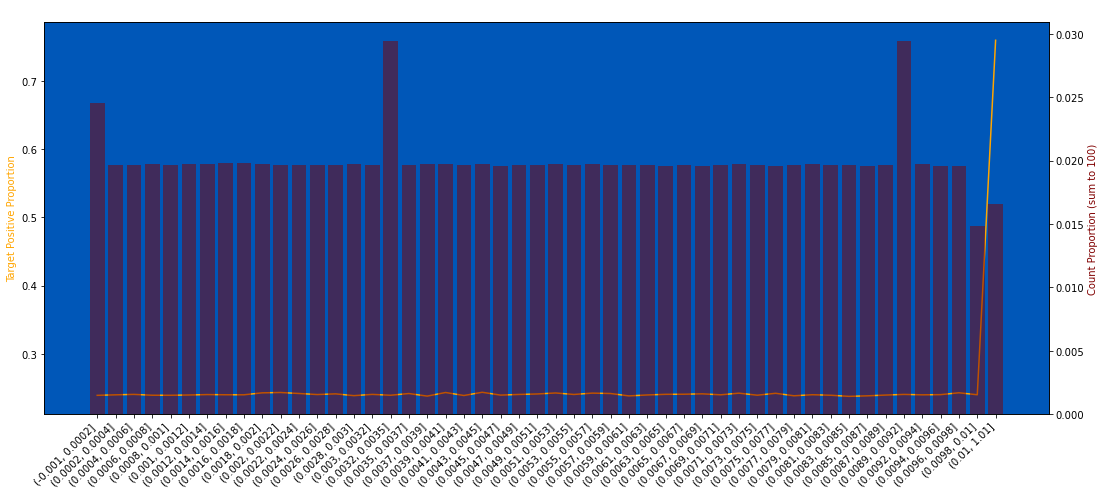

In [117]:
plot_target_check(train, "R_21", q=50, use_raw_bin=True)

In [118]:
%%time
train, test = round_dfs(train, test, col="R_21", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 231 ms, sys: 723 ms, total: 954 ms
Wall time: 1.9 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


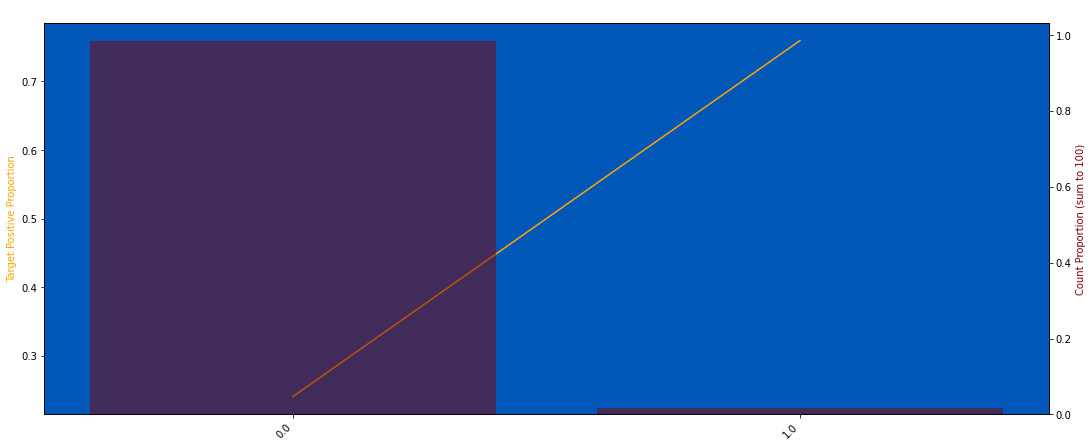

In [119]:
plot_target_check(train, "R_21", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


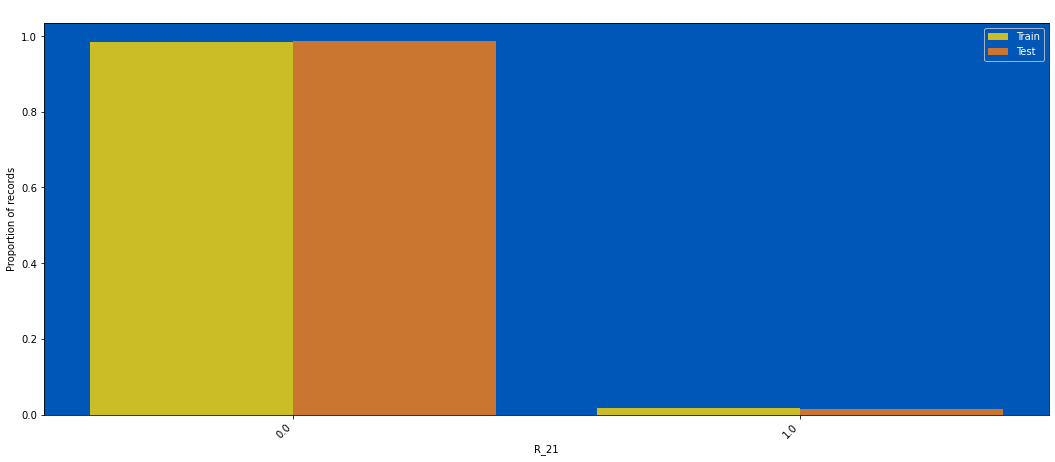

In [120]:
plot_train_test_distribution(train, test, "R_21", nunique_thr=500, without_drop_tail=True)

### R_22

0 null count, 0.000 null proportion
nan of the targets have label = 1


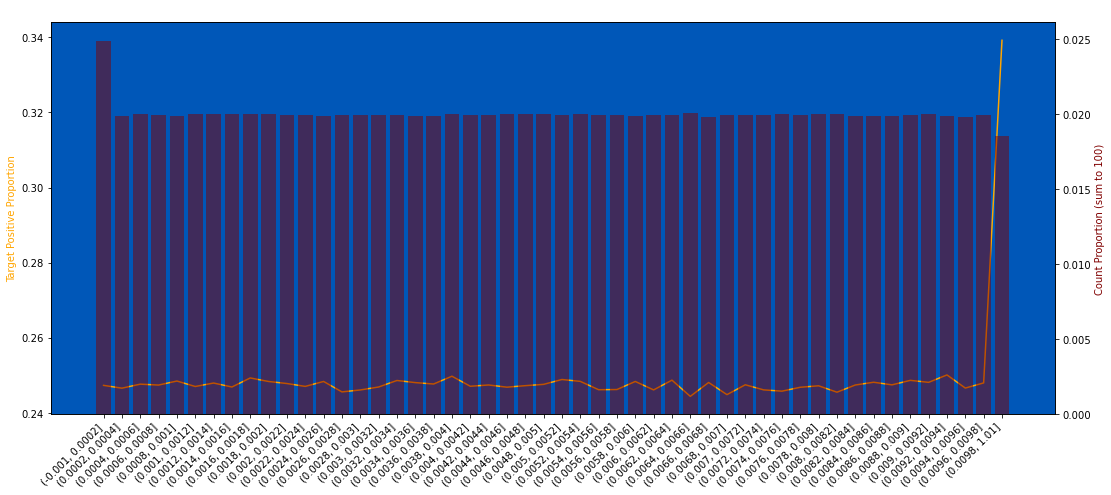

In [121]:
plot_target_check(train, "R_22", q=50, use_raw_bin=True)

In [122]:
%%time
train, test = round_dfs(train, test, col="R_22", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 237 ms, sys: 688 ms, total: 925 ms
Wall time: 1.88 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


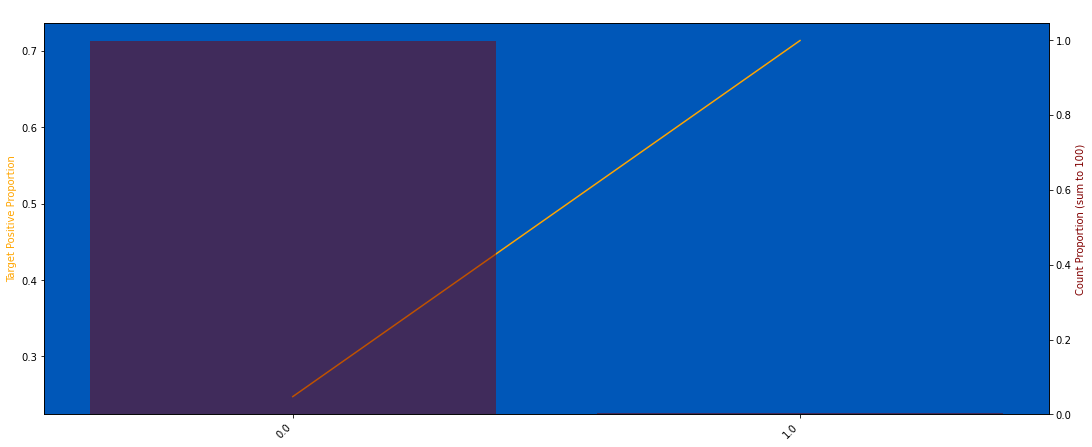

In [123]:
plot_target_check(train, "R_22", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


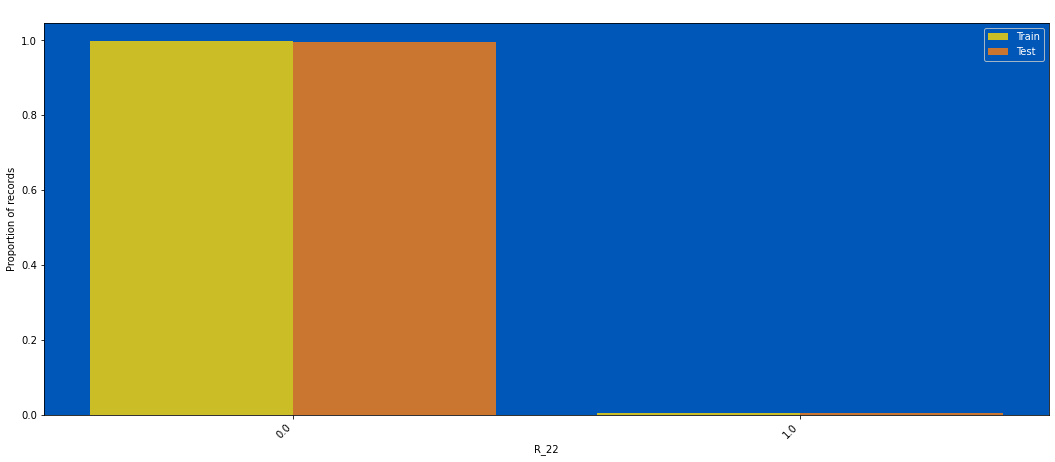

In [124]:
plot_train_test_distribution(train, test, "R_22", nunique_thr=500, without_drop_tail=True)

### R_23

0 null count, 0.000 null proportion
nan of the targets have label = 1


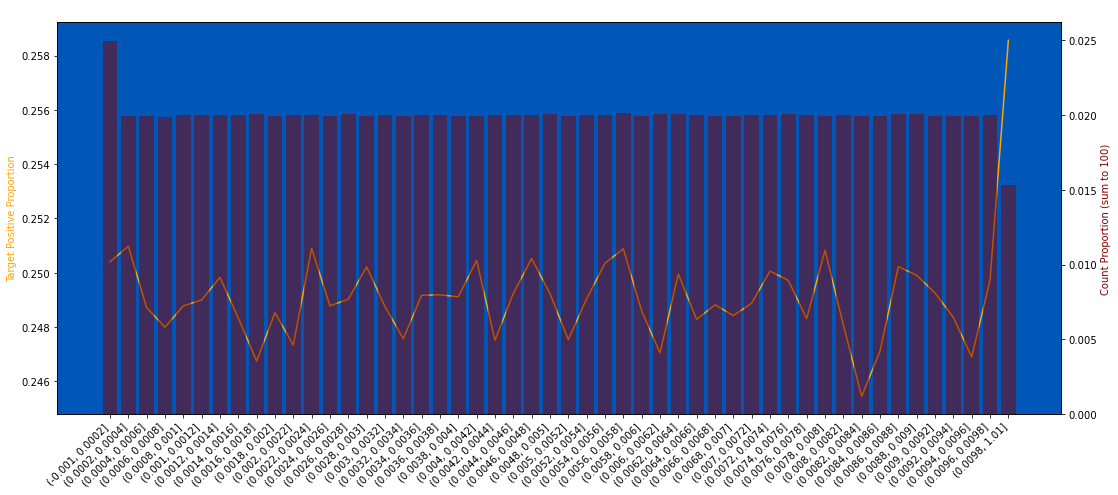

In [125]:
plot_target_check(train, "R_23", q=50, use_raw_bin=True)

In [126]:
%%time
train, test = round_dfs(train, test, col="R_23", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 234 ms, sys: 730 ms, total: 964 ms
Wall time: 1.91 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


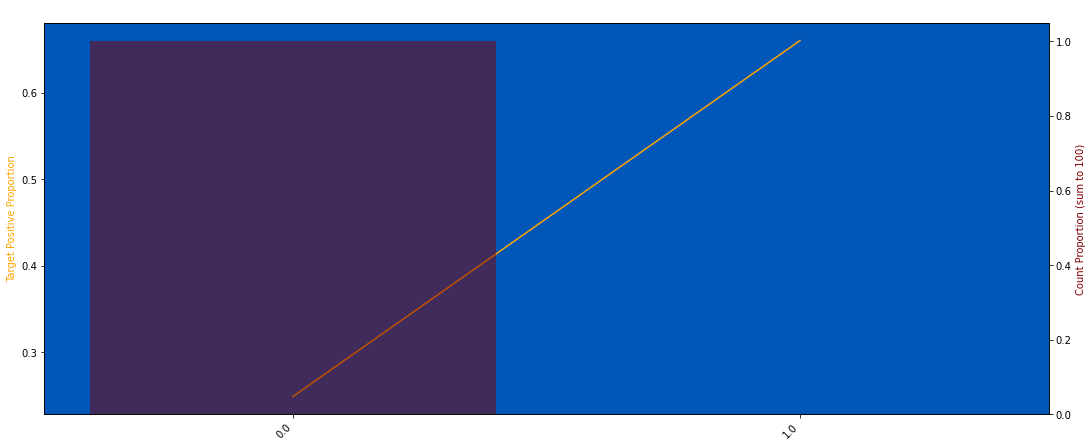

In [127]:
plot_target_check(train, "R_23", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


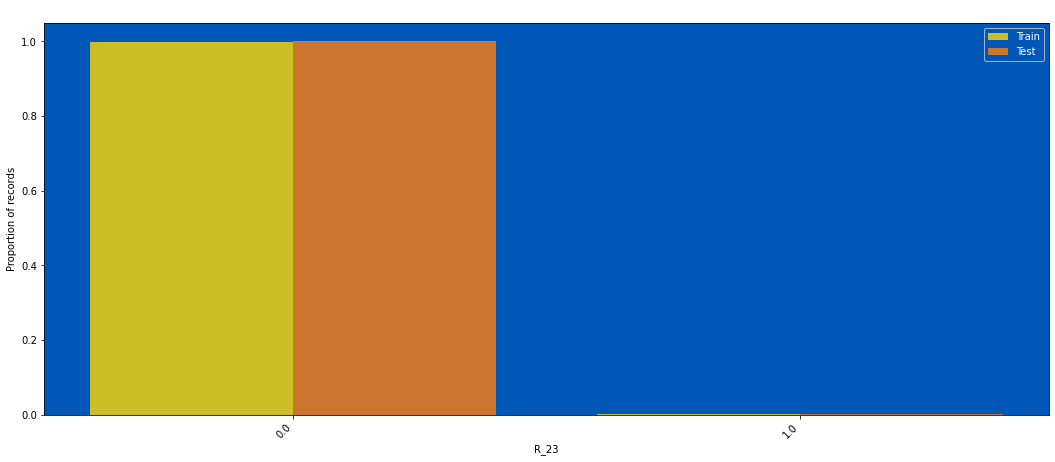

In [128]:
plot_train_test_distribution(train, test, "R_23", nunique_thr=500, without_drop_tail=True)

### R_24

0 null count, 0.000 null proportion
nan of the targets have label = 1


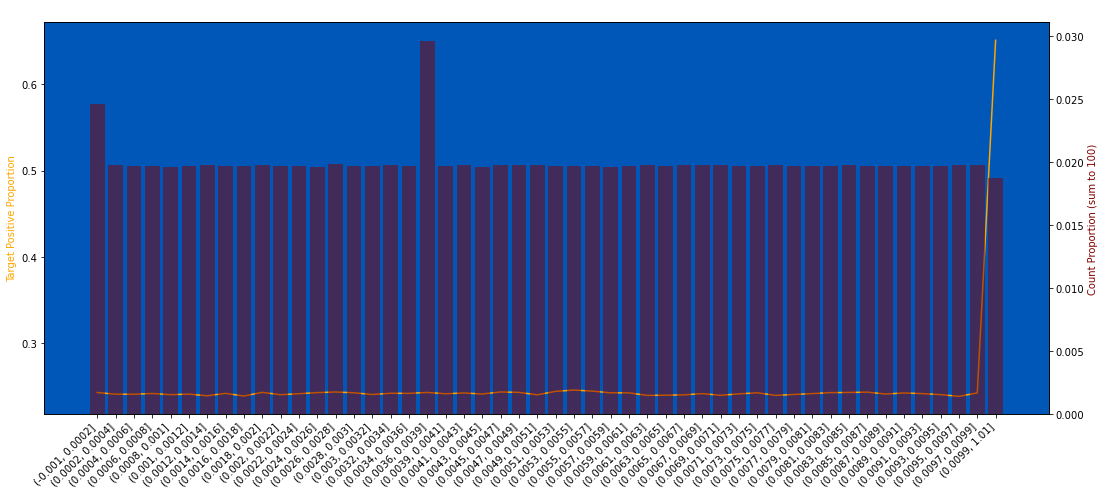

In [129]:
plot_target_check(train, "R_24", q=50, use_raw_bin=True)

In [130]:
%%time
train, test = round_dfs(train, test, col="R_24", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 230 ms, sys: 716 ms, total: 946 ms
Wall time: 1.89 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


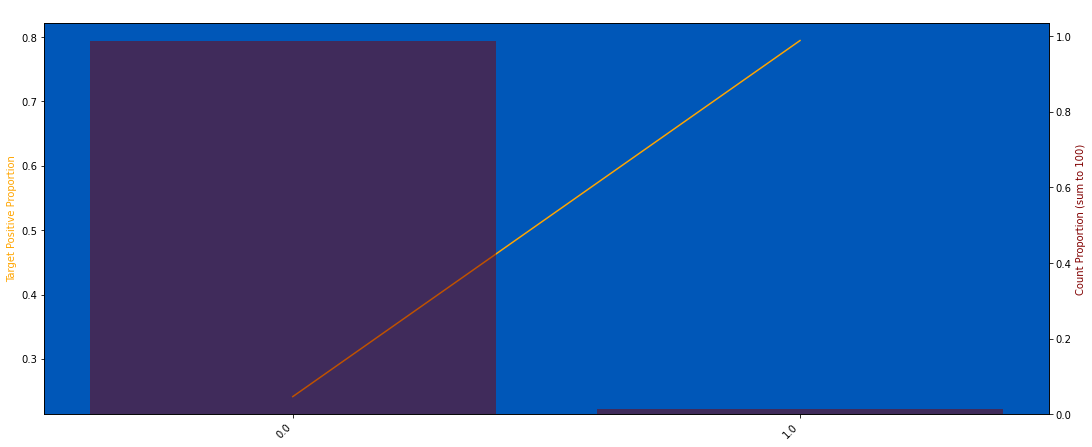

In [131]:
plot_target_check(train, "R_24", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


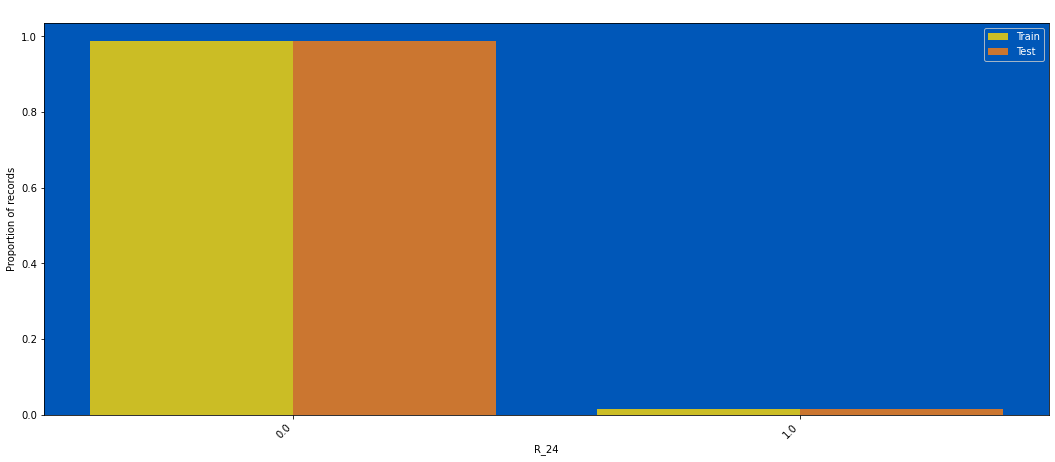

In [132]:
plot_train_test_distribution(train, test, "R_24", nunique_thr=500, without_drop_tail=True)

### R_25

0 null count, 0.000 null proportion
nan of the targets have label = 1


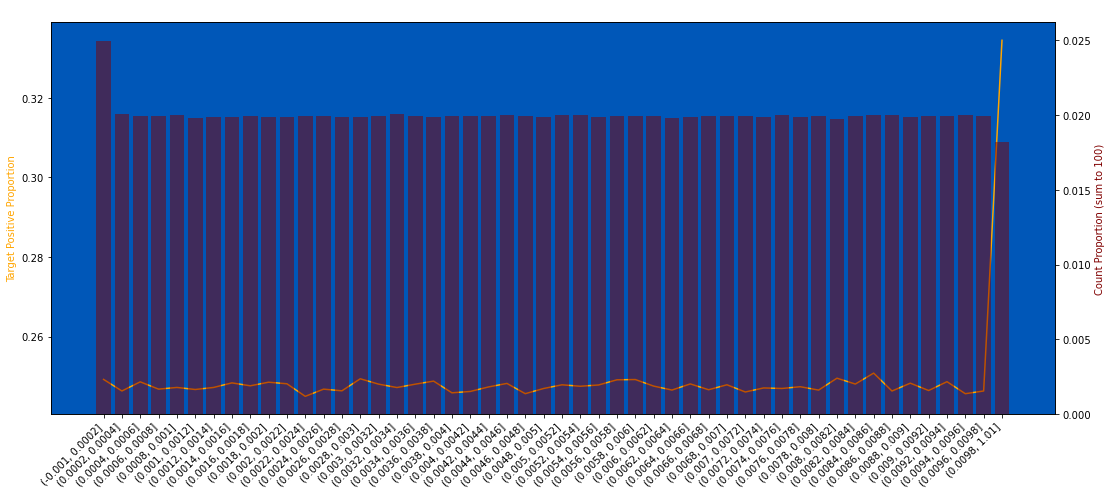

In [133]:
plot_target_check(train, "R_25", q=50, use_raw_bin=True)

In [134]:
%%time
train, test = round_dfs(train, test, col="R_25", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 232 ms, sys: 736 ms, total: 968 ms
Wall time: 1.93 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


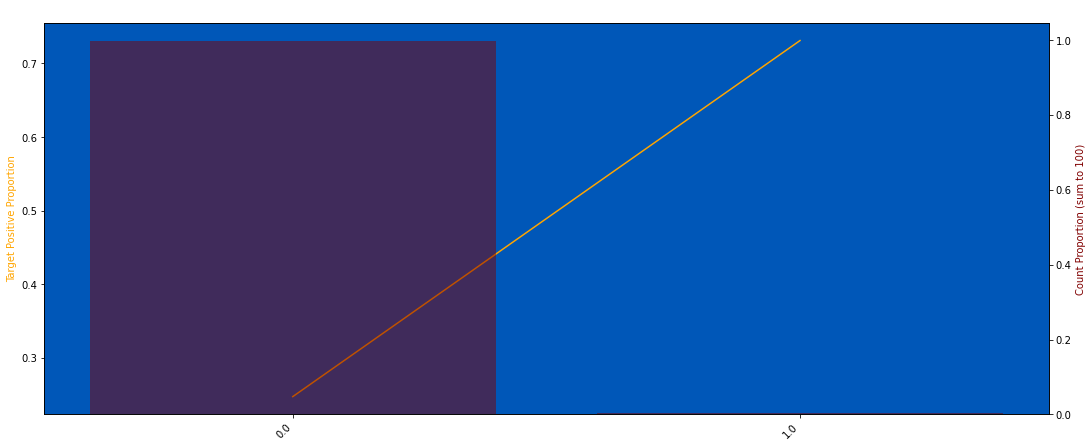

In [135]:
plot_target_check(train, "R_25", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


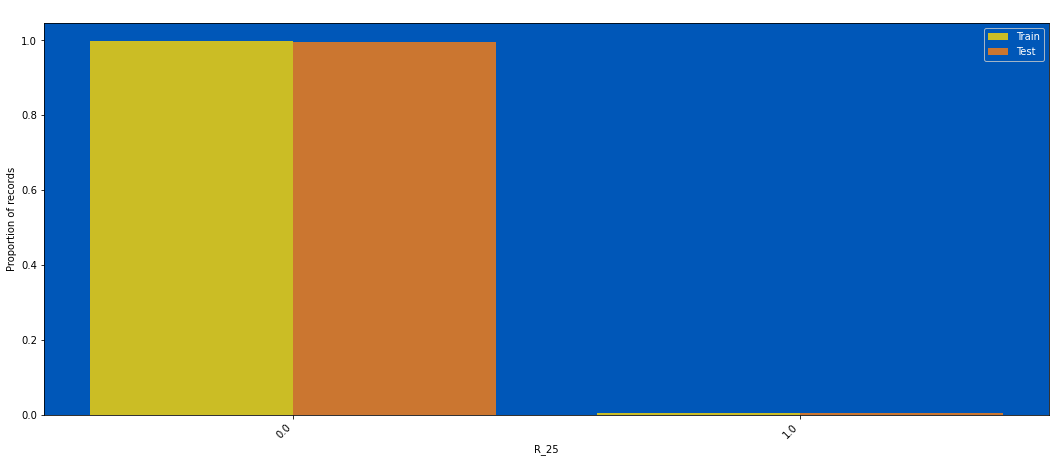

In [136]:
plot_train_test_distribution(train, test, "R_25", nunique_thr=500, without_drop_tail=True)

### R_26

4922146 null count, 0.890 null proportion
0.2082 of the targets have label = 1


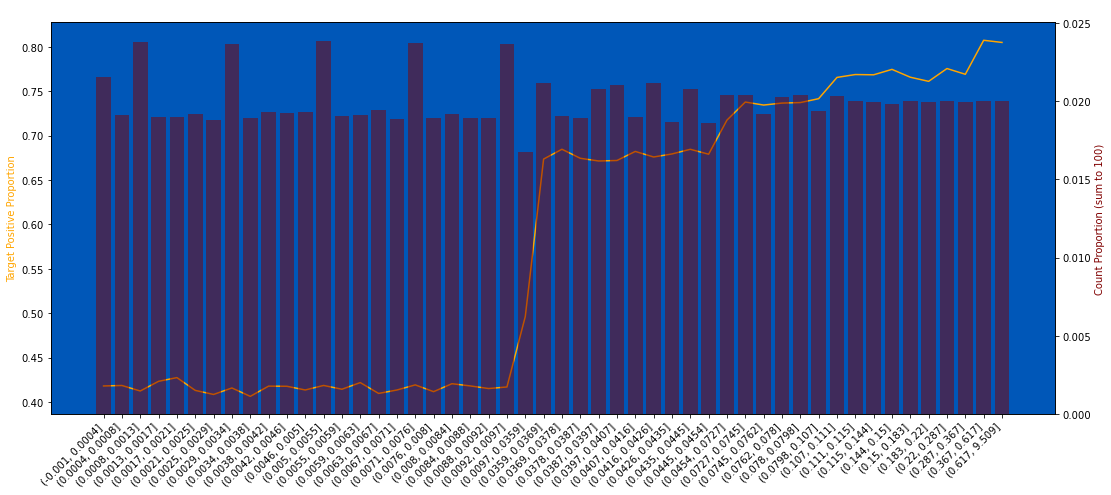

In [137]:
plot_target_check(train, "R_26", q=50, use_raw_bin=True)

In [138]:
%%time
train, test = round_dfs(train, test, col="R_26", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 216 ms, sys: 690 ms, total: 906 ms
Wall time: 2.02 s


4922146 null count, 0.890 null proportion
0.2082 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


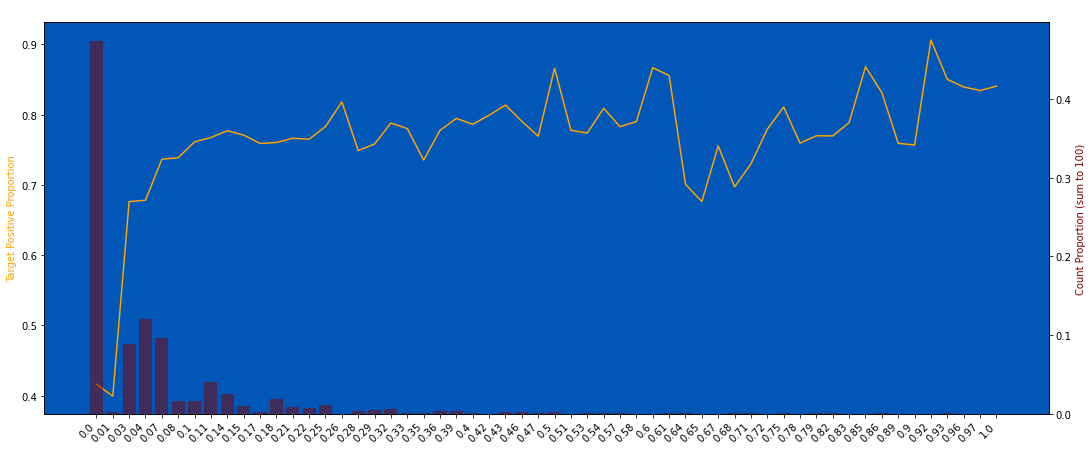

In [139]:
plot_target_check(train, "R_26", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


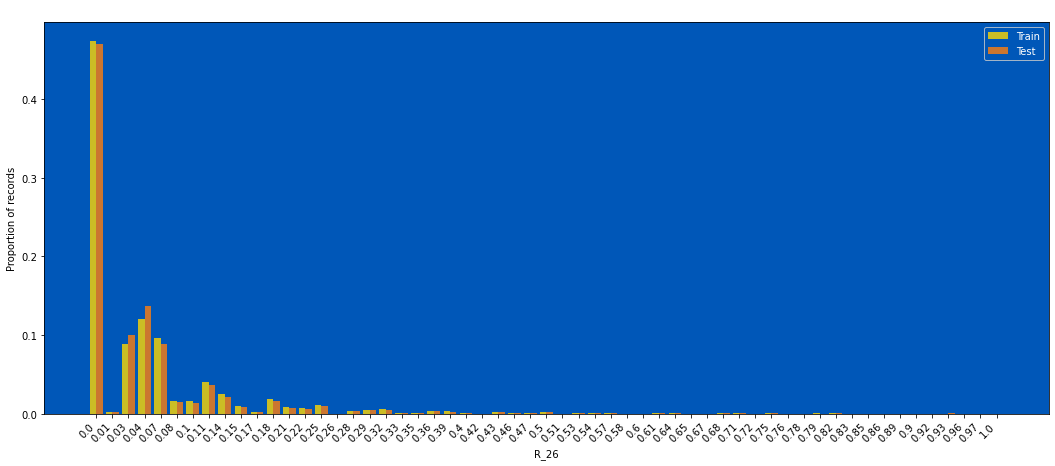

In [140]:
plot_train_test_distribution(train, test, "R_26", nunique_thr=5000)

### R_27

128703 null count, 0.023 null proportion
0.3361 of the targets have label = 1


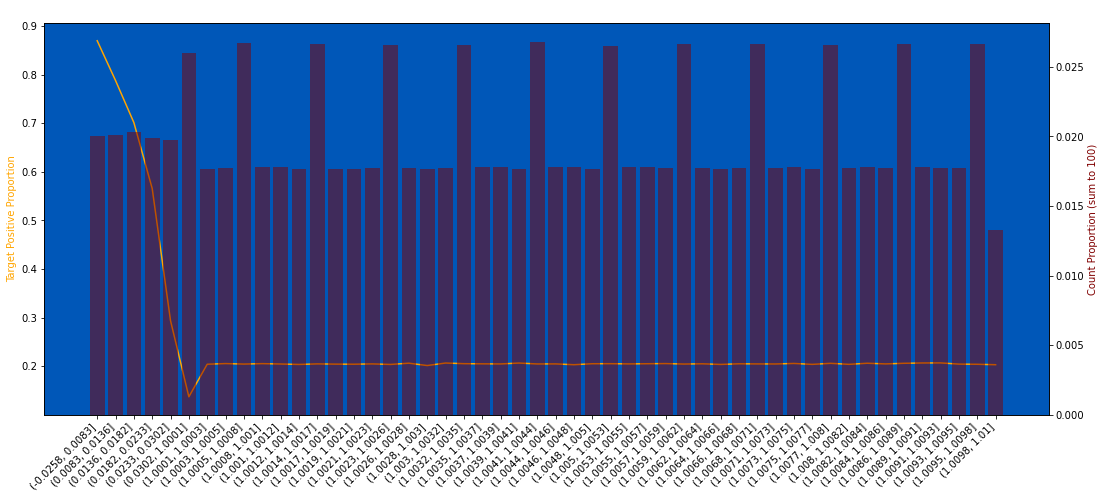

In [141]:
plot_target_check(train, "R_27", q=50, use_raw_bin=True)

In [142]:
%%time
train, test = round_dfs(train, test, col="R_27", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 210 ms, sys: 726 ms, total: 936 ms
Wall time: 1.9 s


128703 null count, 0.023 null proportion
0.3361 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


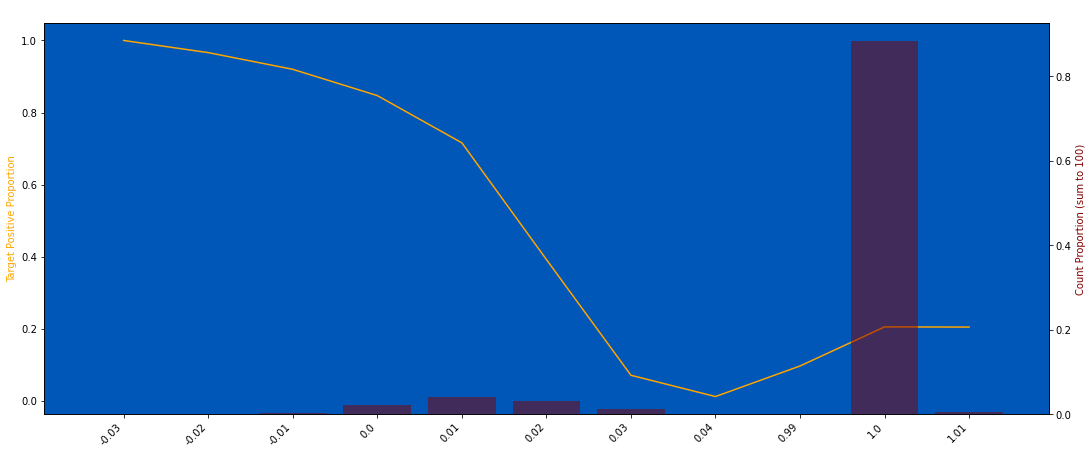

In [143]:
plot_target_check(train, "R_27", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True, without_drop_tail=True)

In [144]:
%%time
train["R_27"] = train.groupby("customer_ID")["R_27"].transform(lambda x: x.ffill().bfill())
test["R_27"] = test.groupby("customer_ID")["R_27"].transform(lambda x: x.ffill().bfill())

CPU times: user 1min 37s, sys: 2.88 s, total: 1min 40s
Wall time: 1min 38s


In [147]:
train["R_27"] = train["R_27"].fillna(0.01)
test["R_27"] = test["R_27"].fillna(0.01)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


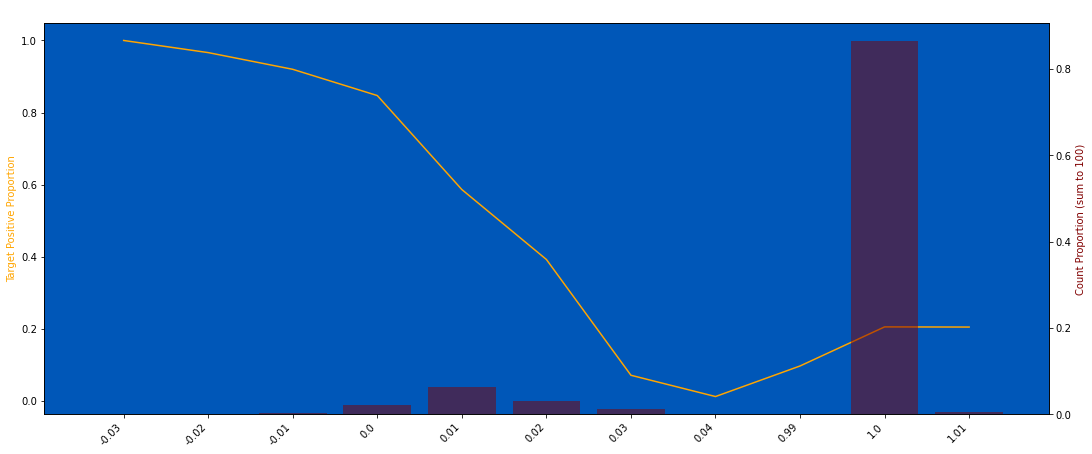

In [148]:
plot_target_check(train, "R_27", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True, without_drop_tail=True)

In [149]:
%%time
train, test = fill_nans(train, test, col="R_27", method="range", range_of_values=(0.99, 1.01), add_new_col=False)

CPU times: user 141 ms, sys: 165 ms, total: 306 ms
Wall time: 305 ms


4800081 null count, 0.868 null proportion
0.2047 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


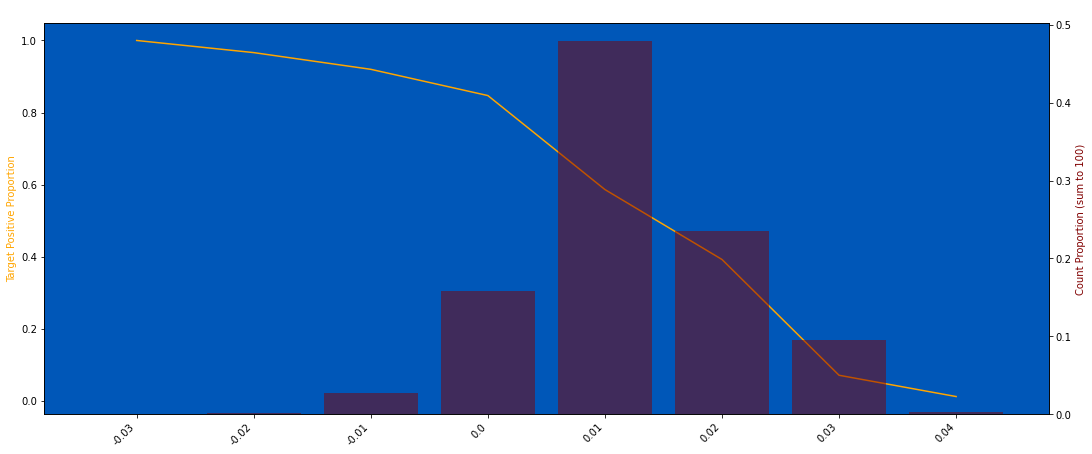

In [150]:
plot_target_check(train, "R_27", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


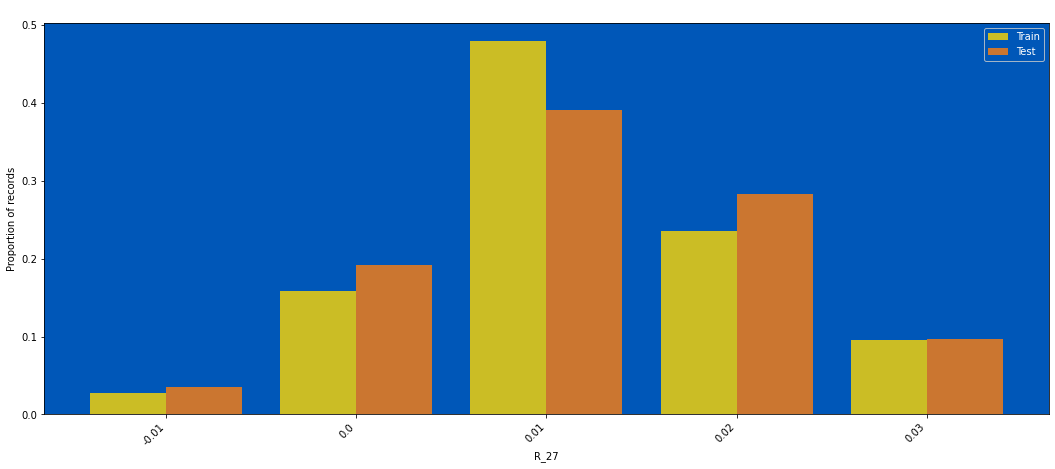

In [151]:
plot_train_test_distribution(train, test, "R_27", nunique_thr=5000)

### R_28

0 null count, 0.000 null proportion
nan of the targets have label = 1


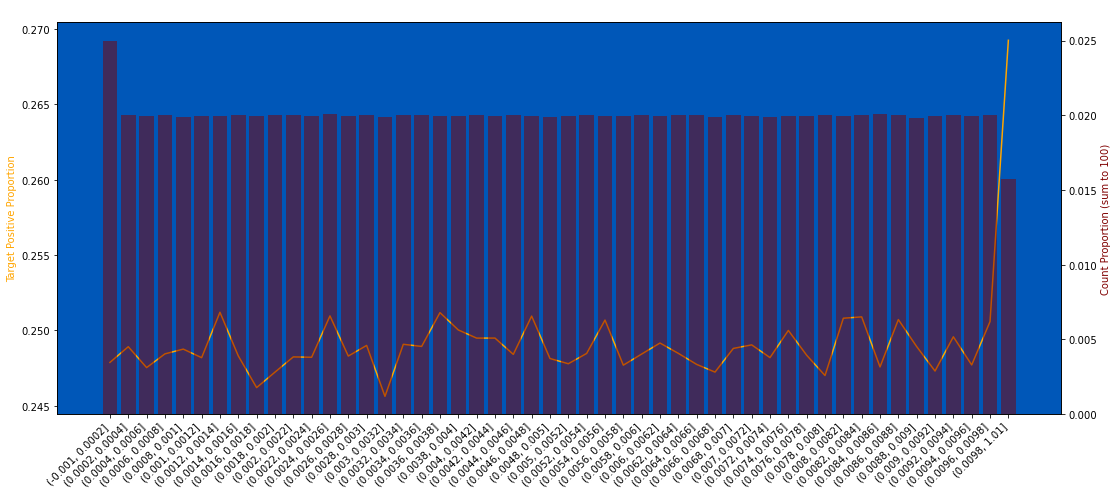

In [152]:
plot_target_check(train, "R_28", q=50, use_raw_bin=True)

In [158]:
%%time
train, test = round_dfs(train, test, col="R_28", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 174 ms, sys: 600 ms, total: 774 ms
Wall time: 1.8 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


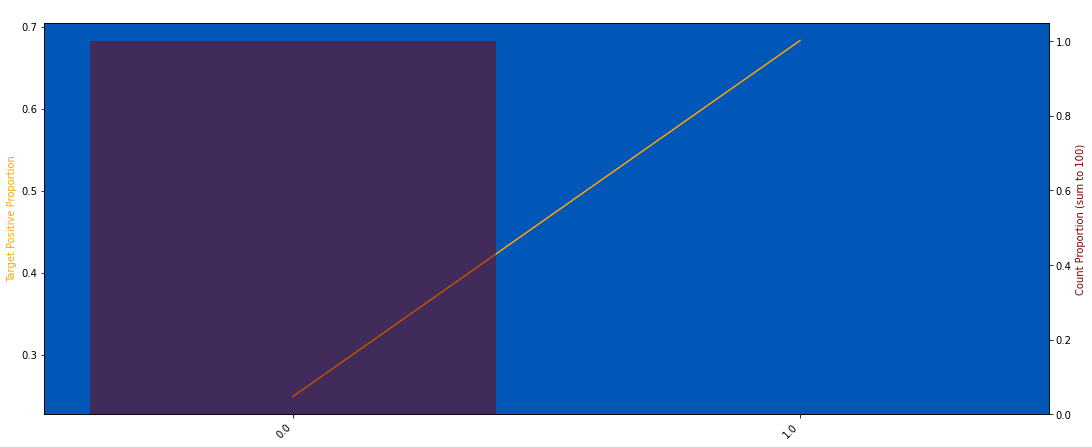

In [159]:
plot_target_check(train, "R_28", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


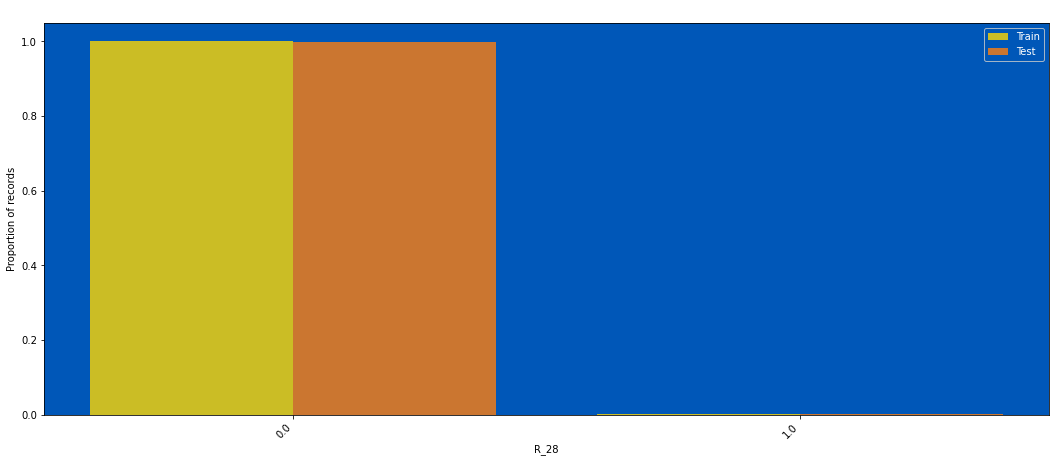

In [161]:
plot_train_test_distribution(train, test, "R_28", nunique_thr=5000, without_drop_tail=True)

### Column checking

In [162]:
from tqdm import tqdm

In [163]:
all_columns = get_cols(train, ["R_"])

In [165]:
for d in tqdm(all_columns):
    train[d] = train[d].fillna(-127)
    test[d] = test[d].fillna(-127)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:05<00:00,  5.32it/s]


In [166]:
d_col_nunique = train[all_columns].nunique()

In [167]:
less_unique_d_cols = d_col_nunique[d_col_nunique < 64].index.tolist()

In [168]:
for d in less_unique_d_cols:
    print(d, ":", train[d].dtype, "\n", sorted(train[d].unique().tolist()), "\n")

R_1 : int64 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] 

R_2 : float64 
 [0.0, 1.0] 

R_4 : float64 
 [0.0, 1.0] 

R_5 : float64 
 [-127.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 43.0, 47.0, 48.0, 61.0, 70.0] 

R_8 : float64 
 [-127.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 27.0, 28.0, 29.0, 32.0, 33.0, 34.0, 38.0] 

R_9 : float64 
 [-127.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0] 

R_10 : float64 
 [-127.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 16.0, 17.0, 21.0] 

R_11 : float64 
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14.0, 15.0, 20.0, 21.0, 22.0, 25.0] 

R_13 : float64 
 [-127.0, 0.03, 0.04, 0.06, 0.07, 0.0

In [169]:
cols = [c for c in less_unique_d_cols if c not in ["R_13", "R_17", "R_27"]]

In [171]:
for col in tqdm(cols):
    train[col] = integerize(train[col])
    test[col] = integerize(test[col])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:02<00:00,  6.36it/s]


In [172]:
%%time
train = train.drop(columns="temp", errors="ignore")
test = test.drop(columns="temp", errors="ignore")

CPU times: user 494 ms, sys: 634 ms, total: 1.13 s
Wall time: 1.14 s


In [173]:
%%time
train, test = drop_temp_columns(train, test)

Drop 0 columns
CPU times: user 391 ms, sys: 421 ms, total: 811 ms
Wall time: 947 ms


In [174]:
train.shape, test.shape

((5531451, 30), (11363762, 29))

In [175]:
train.columns

Index(['customer_ID', 'S_2', 'R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7',
       'R_8', 'R_9', 'R_10', 'R_11', 'R_12', 'R_13', 'R_14', 'R_15', 'R_16',
       'R_17', 'R_19', 'R_20', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_26',
       'R_27', 'R_28', 'target'],
      dtype='object')

In [176]:
%%time
train.to_parquet(f"{INTERIM_TRAIN_PARQUET_PATH}/risk.parquet")
test.to_parquet(f"{INTERIM_TEST_PARQUET_PATH}/risk.parquet")

CPU times: user 5.85 s, sys: 651 ms, total: 6.5 s
Wall time: 5.97 s


In [177]:
END = time.time()

In [178]:
print(f"{END - START:.2f} seconds elapsed")

783.22 seconds elapsed
